### Predicting Song Popularity: Data-Driven Insights from Spotify and YouTube

**Introduction:**

In today’s digital age, music streaming platforms like Spotify and YouTube play a pivotal role in shaping musical trends and determining the popularity of songs. Music popularity is no longer just about catchy melodies and memorable lyrics; instead, it involves a complex blend of various musical, technical, and social metrics. Analyzing the underlying elements that make a song resonate with a broad audience can provide valuable insights for artists, producers, and music marketers. This dataset, gathered from Spotify and YouTube, captures diverse attributes of songs, ranging from acoustic qualities like danceability and loudness to social metrics like views, likes, and streams. Here, the number of streams on Spotify serves as a proxy for a song’s popularity, offering a measurable indicator of listener engagement and appeal.

**Objective:**

The objective of this study is to dissect each song’s components using a rich dataset of 26 variables, aiming to uncover patterns that differentiate highly popular songs from less popular ones. By examining attributes such as energy, valence, tempo, and social engagement metrics, we seek to identify the key elements that contribute to a song’s appeal and longevity on streaming and video platforms. This analysis will ultimately provide a data-driven perspective on what makes a song popular, guiding industry strategies for creating and promoting future hits.

In [1]:
#Loading necessary packages
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from boruta import BorutaPy
from BorutaShap import BorutaShap
from sklearn.ensemble import RandomForestRegressor
import statsmodels.formula.api as smf
from colorama import Fore, Style
from scipy import stats
import patsy as pt
from patsy import dmatrices
from simple_colors import *
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.stats import diagnostic as sms
import math 
from sklearn.preprocessing import StandardScaler
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.nonparametric.smoothers_lowess import lowess
import itertools

## 1. Data Loading and Cleaning

In [2]:
# Download latest version
path = kagglehub.dataset_download("salvatorerastelli/spotify-and-youtube")

print("Path to dataset files:", path)

Path to dataset files: /Users/raghavirajumohan/.cache/kagglehub/datasets/salvatorerastelli/spotify-and-youtube/versions/2


In [3]:
# Define the path to the dataset folder
dataset_folder = "/Users/raghavirajumohan/.cache/kagglehub/datasets/salvatorerastelli/spotify-and-youtube/versions/2"

# List all files in the directory

files = os.listdir(dataset_folder)
print("Files in dataset folder:", files)

Files in dataset folder: ['Spotify_Youtube.csv']


### i. Checking the Data

In [4]:
# Load the dataset
csv_file = os.path.join(dataset_folder, "Spotify_Youtube.csv")  # Replace "filename.csv" with the actual filename
data = pd.read_csv(csv_file)
data = data.drop(data.columns[0], axis=1)

# Display the first few rows
data

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


**Dealing with NULL Values**

In [5]:
data.isna().sum()

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [6]:
data = data.dropna().reset_index(drop=True)

In [7]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Danceability,19170.0,6.200000e-01,1.700000e-01,0.00,0.52,0.64,7.400000e-01,9.800000e-01
Energy,19170.0,6.400000e-01,2.100000e-01,0.00,0.51,0.67,8.000000e-01,1.000000e+00
Key,19170.0,5.290000e+00,3.580000e+00,0.00,2.00,5.00,8.000000e+00,1.100000e+01
Loudness,19170.0,-7.620000e+00,4.620000e+00,-46.25,-8.74,-6.50,-4.920000e+00,9.200000e-01
Speechiness,19170.0,9.000000e-02,1.000000e-01,0.00,0.04,0.05,1.000000e-01,9.600000e-01
Acousticness,19170.0,2.900000e-01,2.900000e-01,0.00,0.04,0.19,4.700000e-01,1.000000e+00
Instrumentalness,19170.0,6.000000e-02,1.900000e-01,0.00,0.00,0.00,0.000000e+00,1.000000e+00
Liveness,19170.0,1.900000e-01,1.700000e-01,0.01,0.09,0.12,2.300000e-01,1.000000e+00
Valence,19170.0,5.300000e-01,2.400000e-01,0.00,0.34,0.54,7.200000e-01,9.900000e-01
Tempo,19170.0,1.206100e+02,2.959000e+01,0.00,97.00,119.97,1.399500e+02,2.433700e+02


### ii. Feature Engineering - Data Pre-processing 

1. **Binary Encoding for Licensed and official_video**
   - Convert `Licensed` and `official_video` into binary variables (0 and 1) to make them compatible with machine learning models.

2. **Encoding for Album_type**
   - If `Album_type` has multiple categories, create binary indicators for each (e.g., `Album_type_compilation` and `Album_type_single`). If binary, a single indicator is sufficient.

3. **Log Transformation for Highly Skewed Variables**
   - Apply a log transformation to variables like `Views`, `Likes`, `Comments`, and `Stream` to normalize distributions and reduce the impact of outliers.

4. **Square Root Transformation for Moderately Skewed Variables**
   - For variables like `Duration_ms`, a square root transformation may reduce skewness. Check the distribution to confirm if this or a log transformation is more suitable.

5. **Standardization for Variables with Different Scales**
   - Standardize variables such as `Danceability`, `Energy`, `Loudness`, and `Tempo` for comparable scales, centering them around a mean of 0 and standard deviation of 1.

#### 1. Variable Encoding

In [8]:
# 1. Binary Encoding for Licensed and official_video
data['Licensed'] = data['Licensed'].apply(lambda x: 1 if x else 0)
data['official_video'] = data['official_video'].apply(lambda x: 1 if x else 0)

# 2. Binary Encoding for Album_type (Only two categories, so creating 'Album_single' column)
data['Album_single'] = data['Album_type'].apply(lambda x: 1 if x == 'single' else 0)
data = data.drop(columns=['Album_type'])  # Drop the original Album_type column


In [9]:
#3. Log Tranformation

# Clip Instrumentalness values to avoid extreme values close to 0 and 1
data['Instrumentalness'] = data['Instrumentalness'].clip(1e-5, 1 - 1e-5)
# Apply the logit transformation safely
data['Instrumentalness_logit'] = np.log(data['Instrumentalness'] / (1 - data['Instrumentalness']))

In [10]:
# 4. Log Transformation for Highly Skewed Variables
# Variables like Views, Likes, Comments, Duration_ms, and Stream
variables_to_log = ['Views', 'Likes', 'Comments', 'Stream','Duration_ms']
for var in variables_to_log:
    data[f'log_{var}'] = np.log1p(data[var])  # np.log1p to handle zero values

#### 3. Standardization

In [11]:
# 5. Standardization for Variables with Different Scales

X = data[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness','Acousticness', 'Instrumentalness_logit', 'Liveness', 'Valence', 'Tempo',
       'log_Views', 'log_Likes', 'log_Comments','log_Duration_ms','log_Stream']]
y = data['log_Stream']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back into a DataFrame with the same column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Replace the original columns in the 'data' DataFrame with the standardized values
data[X.columns] = X_scaled_df

## 2. Feature Selection

### i. Quantitative Variables

In [12]:
dt = data[['Danceability','Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness_logit', 'Liveness', 'Valence', 'Tempo','Licensed', 'official_video',
        'Album_single','log_Views', 'log_Likes', 'log_Comments', 'log_Stream',
       'log_Duration_ms']]
dt = dt.dropna().reset_index(drop=True)

In [13]:
quant_dt = dt[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
 'Acousticness', 'Instrumentalness_logit', 'Liveness', 'Valence', 'Tempo',
       'log_Views', 'log_Likes', 'log_Comments',
       'log_Duration_ms','log_Stream']]

cat_dt = dt[['Licensed','official_video', 'Album_single']]

### Dealing with Multicollinearity - VIF Test

In [14]:
# Drop 'log_Stream' from the DataFrame for VIF calculation
vif_table = quant_dt.drop(columns=['log_Stream'])

# Create the VIF DataFrame
vif_data = pd.DataFrame()
vif_data["feature"] = vif_table.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_table.values, i) for i in range(len(vif_table.columns))]

# Sort VIF values in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

vif_data


,feature,VIF
0,log_Likes,25.402351
1,log_Views,18.211977
2,log_Comments,6.525339
3,Energy,3.514225
4,Loudness,3.356408
5,Acousticness,1.922094
6,Danceability,1.656276
7,Valence,1.595283
8,Instrumentalness_logit,1.511481
9,Speechiness,1.138022


The Variance Inflation Factor (VIF) analysis identifies `log_Likes` and `log_Views` with VIF values above 10, signaling high collinearity. High collinearity implies that these variables are highly correlated with other features in the dataset, which can distort the model’s estimates and reduce interpretability. To ensure model stability and accuracy, variables with VIF > 10 are dropped from the analysis.

In [15]:
# Define the list of selected quantitative variables based on Boruta ranking
selected_quant_vars = quant_dt[['Danceability', 'Energy', 'Loudness', 'Speechiness', 
                       'Acousticness', 'Liveness', 'log_Duration_ms', 
                     'Instrumentalness_logit','log_Comments','Key','Tempo','Valence',]]

### BORUTA SHAP

In [16]:
x = selected_quant_vars
# sqrt on price because of magnitude, done before
y = quant_dt['log_Stream']

xCols = x.columns.tolist()


currentTrainX = x.to_numpy()
currentTrainY = y.to_numpy().ravel()

In [17]:
forest = RandomForestRegressor(n_jobs=-1, max_depth = 5)
forest.fit(currentTrainX, currentTrainY)

RandomForestRegressor(max_depth=5, n_jobs=-1)

In [18]:
np.int = int
np.float = float
np.bool = bool
boruta = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)
boruta.fit(currentTrainX, currentTrainY)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	1
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	1
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	1
Iteration:

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=89,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x13E453440),
         n_estimators='auto', random_state=RandomState(MT19937) at 0x13E453440,
         verbose=2)

In [19]:
featureSupport = list((zip(xCols, boruta.support_)))
featureSupport

[('Danceability', True),
 ('Energy', True),
 ('Loudness', True),
 ('Speechiness', True),
 ('Acousticness', True),
 ('Liveness', True),
 ('log_Duration_ms', True),
 ('Instrumentalness_logit', True),
 ('log_Comments', True),
 ('Key', False),
 ('Tempo', False),
 ('Valence', False)]

In [20]:
featureRanks = list(zip(xCols, boruta.ranking_))
sorted(featureRanks, key=lambda x: x[1])

[('Danceability', 1),
 ('Energy', 1),
 ('Loudness', 1),
 ('Speechiness', 1),
 ('Acousticness', 1),
 ('Liveness', 1),
 ('log_Duration_ms', 1),
 ('Instrumentalness_logit', 1),
 ('log_Comments', 1),
 ('Valence', 2),
 ('Tempo', 3),
 ('Key', 4)]

In [21]:
# Dropping Key, Tempo, Loudness, and Energy
dt = dt.drop(columns=['Key', 'Tempo', 'Loudness', 'Energy'])

In this analysis, we applied the Boruta SHAP feature selection algorithm to identify the most significant predictors of song popularity. Using a Random Forest model as the base estimator, Boruta iteratively assessed the importance of each feature, retaining only those that consistently demonstrated a strong influence on the target variable. This rigorous selection process helps in refining the model to focus on the most impactful variables, reducing noise and enhancing interpretability.

The Boruta SHAP process highlighted several variables as highly predictive:

- **`log_Duration_ms`**, **`log_Comments`**, and **`Valence`** emerged as the most critical features, each receiving the highest possible importance ranking (1). The `log_Duration_ms` variable represents the log-transformed duration of a song, indicating that track length significantly influences streaming engagement. `log_Comments`, which captures the number of user comments, serves as a measure of social engagement, suggesting that higher interaction levels correlate with greater popularity. `Valence`, which indicates the positivity or mood of the track, highlights that songs with a more upbeat or happier tone tend to attract a wider audience.

Additional features selected by Boruta SHAP, though slightly less influential, provide further insights into song characteristics that affect popularity:

- **`Instrumentalness_logit`**: Measures the probability that a track is instrumental. This feature reveals that whether or not a song contains vocals can affect listener preference.
- **`Acousticness`**: Indicates the acoustic nature of a song, suggesting that audiences may favor more acoustic sounds for certain genres or moods.
- **`Danceability`**: Assesses a song’s suitability for dancing, which is particularly relevant in genres that target energetic or dance-focused listeners.
- **`Liveness`**: Reflects the likelihood of a song being performed live. This can be a valuable characteristic for songs that aim to create an engaging, concert-like atmosphere.
- **`Speechiness`**: Measures the proportion of spoken words in a song, a crucial factor for genres that emphasize lyrical content, like rap or spoken word.

Following this feature selection, variables with lower rankings, such as `Key`, `Tempo`, `Loudness`, and `Energy`, were excluded from the final model. By focusing on the most relevant predictors, this selection process optimizes model performance, supporting a more precise and interpretable analysis of factors influencing song popularity. This approach provides actionable insights for the music industry, informing strategies for song production, promotion, and audience engagement.


### ii. Factor Variables

### Correlational Analysis

<Axes: >

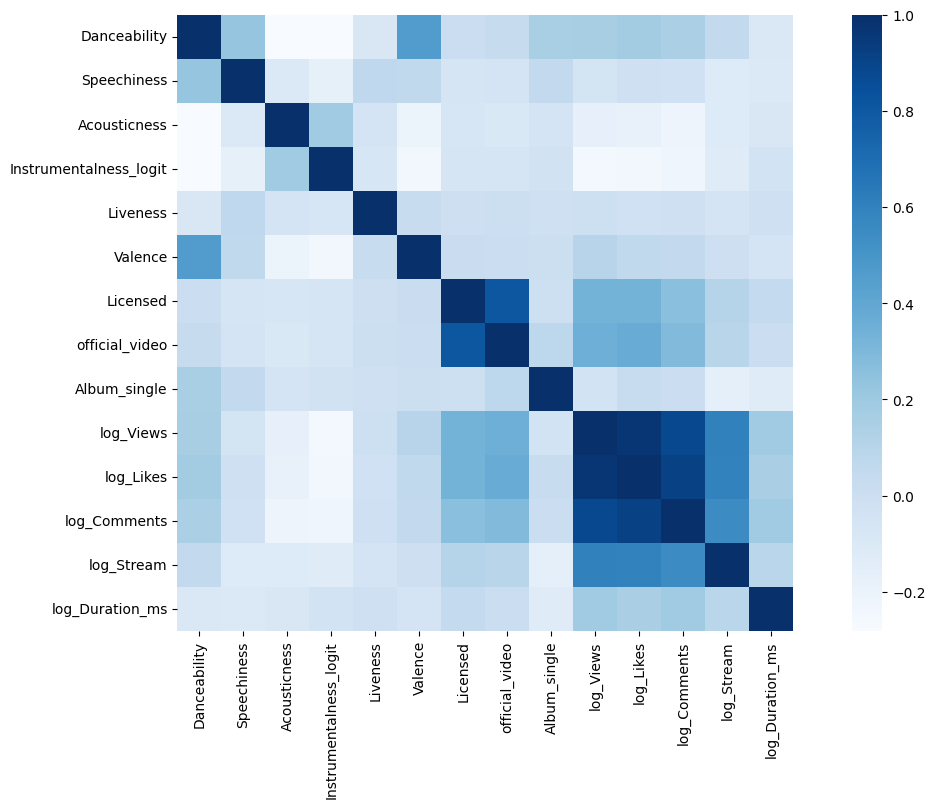

In [22]:
plt.figure(figsize=(15,8))
dt.corr()
c= dt.corr()
sns.heatmap(c,cmap="Blues",square = True, annot = False)

In this correlational analysis, we focus on categorical variables that could shed light on factors influencing song popularity. The heatmap visualizes the relationships between various categorical variables and key numerical features, helping identify dependencies and potential redundancies.

#### Key Observations:

- **Licensed** and **official_video** show a strong positive correlation. This implies that licensed songs are more likely to have official videos, which could amplify their visibility and engagement. However, the high correlation between these variables suggests potential redundancy. Including both in the model could introduce multicollinearity, complicating interpretation and possibly inflating error. Therefore, we might consider dropping one of these variables to improve model stability.
- **Album_single** is moderately correlated with **log_Comments**, **log_Likes**, and **log_Views**, indicating that single releases generally receive more engagement. This correlation aligns with the common industry practice of promoting singles more intensively.
- **log_Stream** (our target variable) is meaningfully correlated with **log_Likes** and **log_Views**, highlighting that audience engagement metrics are significant predictors of popularity.

Based on these observations, categorical variables with high collinearity, such as **Licensed** and **official_video**, may need to be reviewed, and potentially dropped, to prevent issues related to multicollinearity in the final model. This careful selection will aid in maintaining model interpretability and performance.

### ANOVA

In [23]:
factor_var = dt[['Licensed', 'official_video','Album_single']].copy()

anova_results = []

# Performing ANOVA for each factor variable
for factor in factor_var.columns:
    model = smf.ols(f'log_Stream ~ C({factor})', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results.append((factor, anova_table['F'][0], anova_table['PR(>F)'][0]))

# Sort ANOVA results by p-value
anova_results.sort(key=lambda x: x[2])

# Print top factors without color
print("Factors with lowest p-value:")
for factor, F_statistic, p_value in anova_results:
    print(f"Factor: {factor}, F-statistic: {F_statistic}, p-value: {p_value}")

Factors with lowest p-value:
Factor: Album_single, F-statistic: 496.7514995105808, p-value: 1.1597986823191722e-108
Factor: Licensed, F-statistic: 215.58251570713492, p-value: 1.5265558191818767e-48
Factor: official_video, F-statistic: 185.62301776996088, p-value: 4.506034952654702e-42


In assessing the significance of our categorical variables in predicting **log_Stream**, we conducted an ANOVA test, focusing on p-values to determine the relevance of each variable. 

A lower p-value indicates higher statistical significance, meaning the variable has a strong association with the target. Among our factors, **Album_single** shows the highest significance, followed closely by **Licensed** and **official_video**. This implies that whether a song is part of an album or single release, its licensing status, and the presence of an official video all play notable roles in influencing stream counts. 

To optimize model performance, clarity, and avoid multicollinearity—since `Licensed` and `official_video` exhibit high correlation with each other—we will retain **`Album_single`** and **`Licensed`**, as these variables exhibit the lowest p-values and provide more explanatory power for our analysis.


## 3. Exploratory Data Analysis (EDA)

In [24]:
model_data = dt[[
        "Acousticness",
        "Liveness",
        "Speechiness",
      "Danceability",
        "Instrumentalness_logit",
        "Licensed",
       "log_Duration_ms","Valence",'Album_single','log_Comments','log_Stream']]

# Creating the subset for quantitative variables
quant_vars = dt[["log_Duration_ms","Acousticness","Liveness","Speechiness","Instrumentalness_logit","Valence","Danceability",'log_Comments',"log_Stream"]]

# Creating the subset for categorical variables
cat_vars = dt[[ "Licensed","Album_single"]]

### i. Histogram and Density Plots

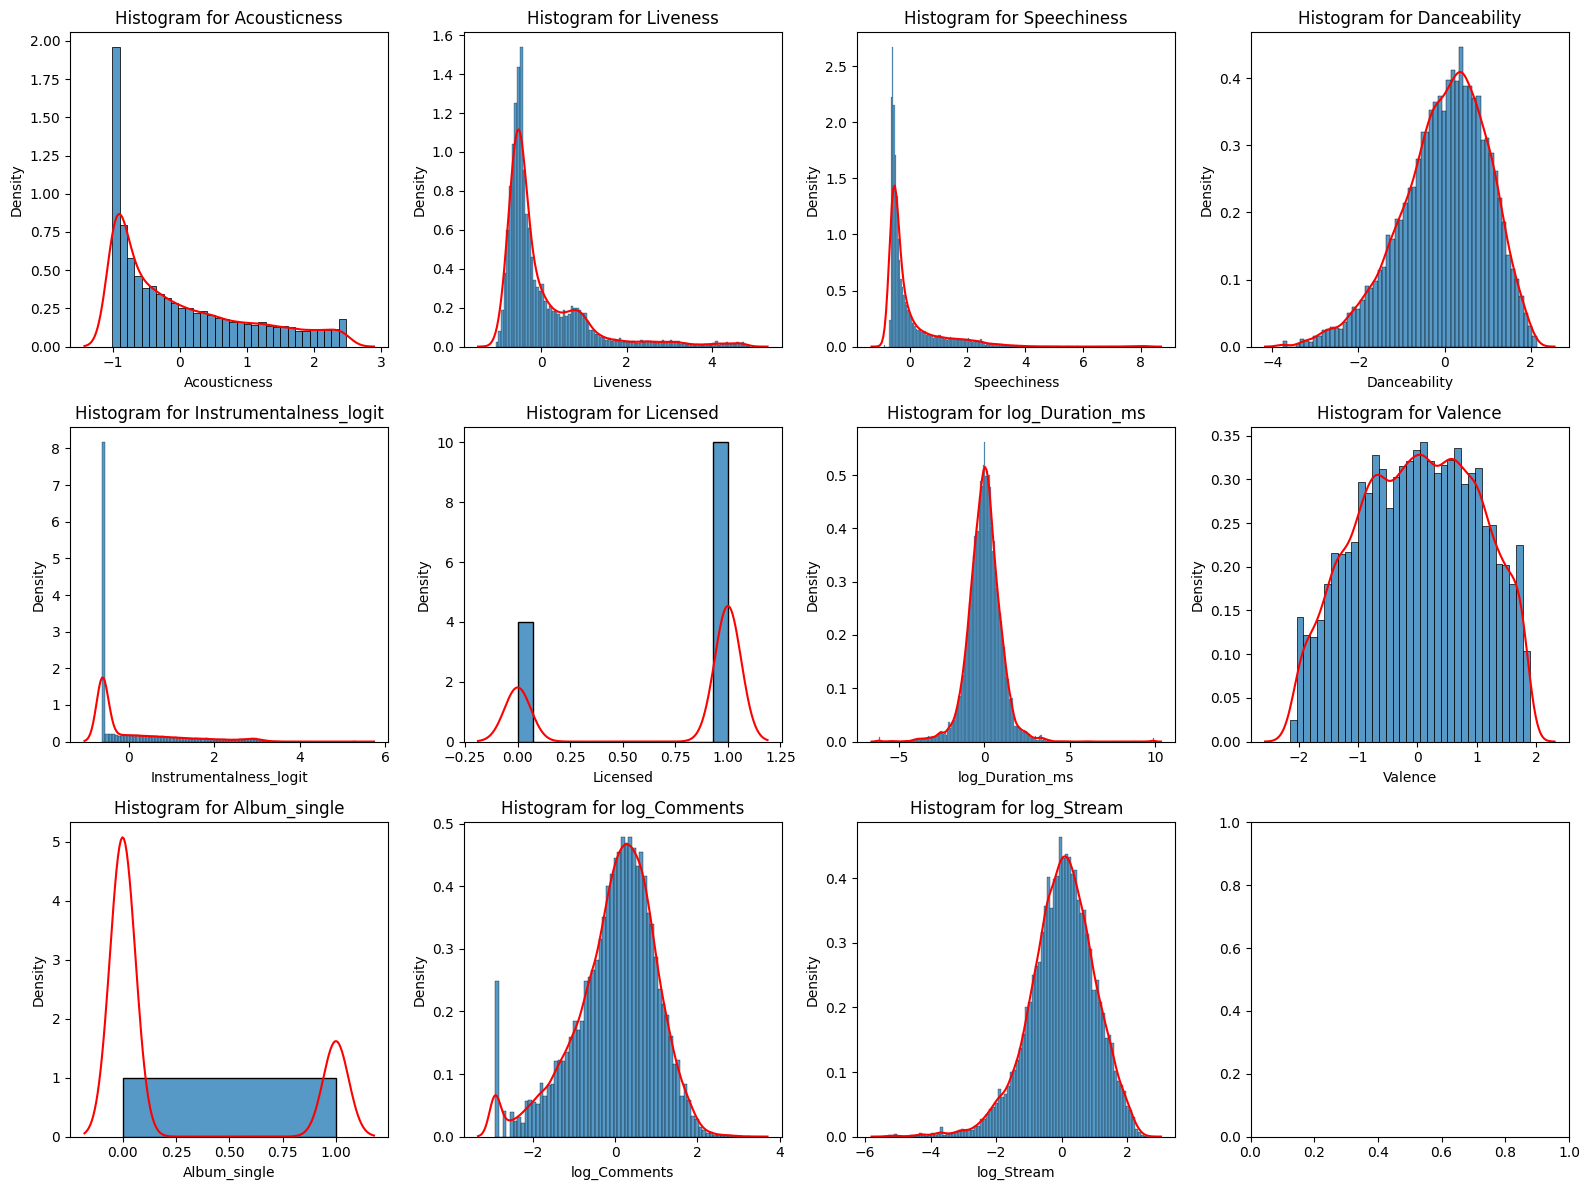

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))


axes = axes.flatten()


for i, col in enumerate(model_data.columns):
    sns.histplot(data[col], stat="density", bins='fd', ax=axes[i])
    sns.kdeplot(data[col], color="red", ax=axes[i], legend=False)
    axes[i].set_title("Histogram for " + col)
    axes[i].set_xlabel(col)


plt.tight_layout()


plt.show()

The histograms with overlaid density lines offer insights into the distributions of various features in the dataset, highlighting both the spread and concentration of values:

- **`Acousticness`, `Liveness`, and `Speechiness`**: These variables exhibit a strong right skew, with the majority of data points clustered towards the lower end of the distribution. The density lines further emphasize this concentration, showing that most songs have low levels of acousticness, liveness, and speech content, which aligns with the characteristics of mainstream music.

- **`Danceability` and `Valence`**: Both variables display a relatively symmetric distribution around the center, with the density lines forming a bell-shaped curve. This indicates that danceability and valence values are spread more evenly across songs, reflecting the diversity in musical compositions and emotional tones.

- **`Instrumentalness_logit`**: This variable is heavily skewed to the right, with the density line indicating a peak near zero. This pattern suggests that most tracks have low instrumentalness, aligning with the prevalence of vocal-driven songs in the dataset.

- **Binary Variables (`Licensed`, `Album_single`)**: The distributions for these binary features show distinct peaks at 0 and 1, as expected for categorical data. The density lines highlight these peaks, especially for **Licensed**, where the higher density at 1 suggests a large proportion of licensed tracks.

- **Log-Transformed Variables (`log_Duration_ms`, `log_Comments`, `log_Stream`)**: These log-transformed variables now exhibit near-normal distributions, as evidenced by the density lines’ bell-shaped curves. Log transformation successfully normalizes these previously skewed variables, making them more suitable for linear modeling.

### ii) Q-Q Plot

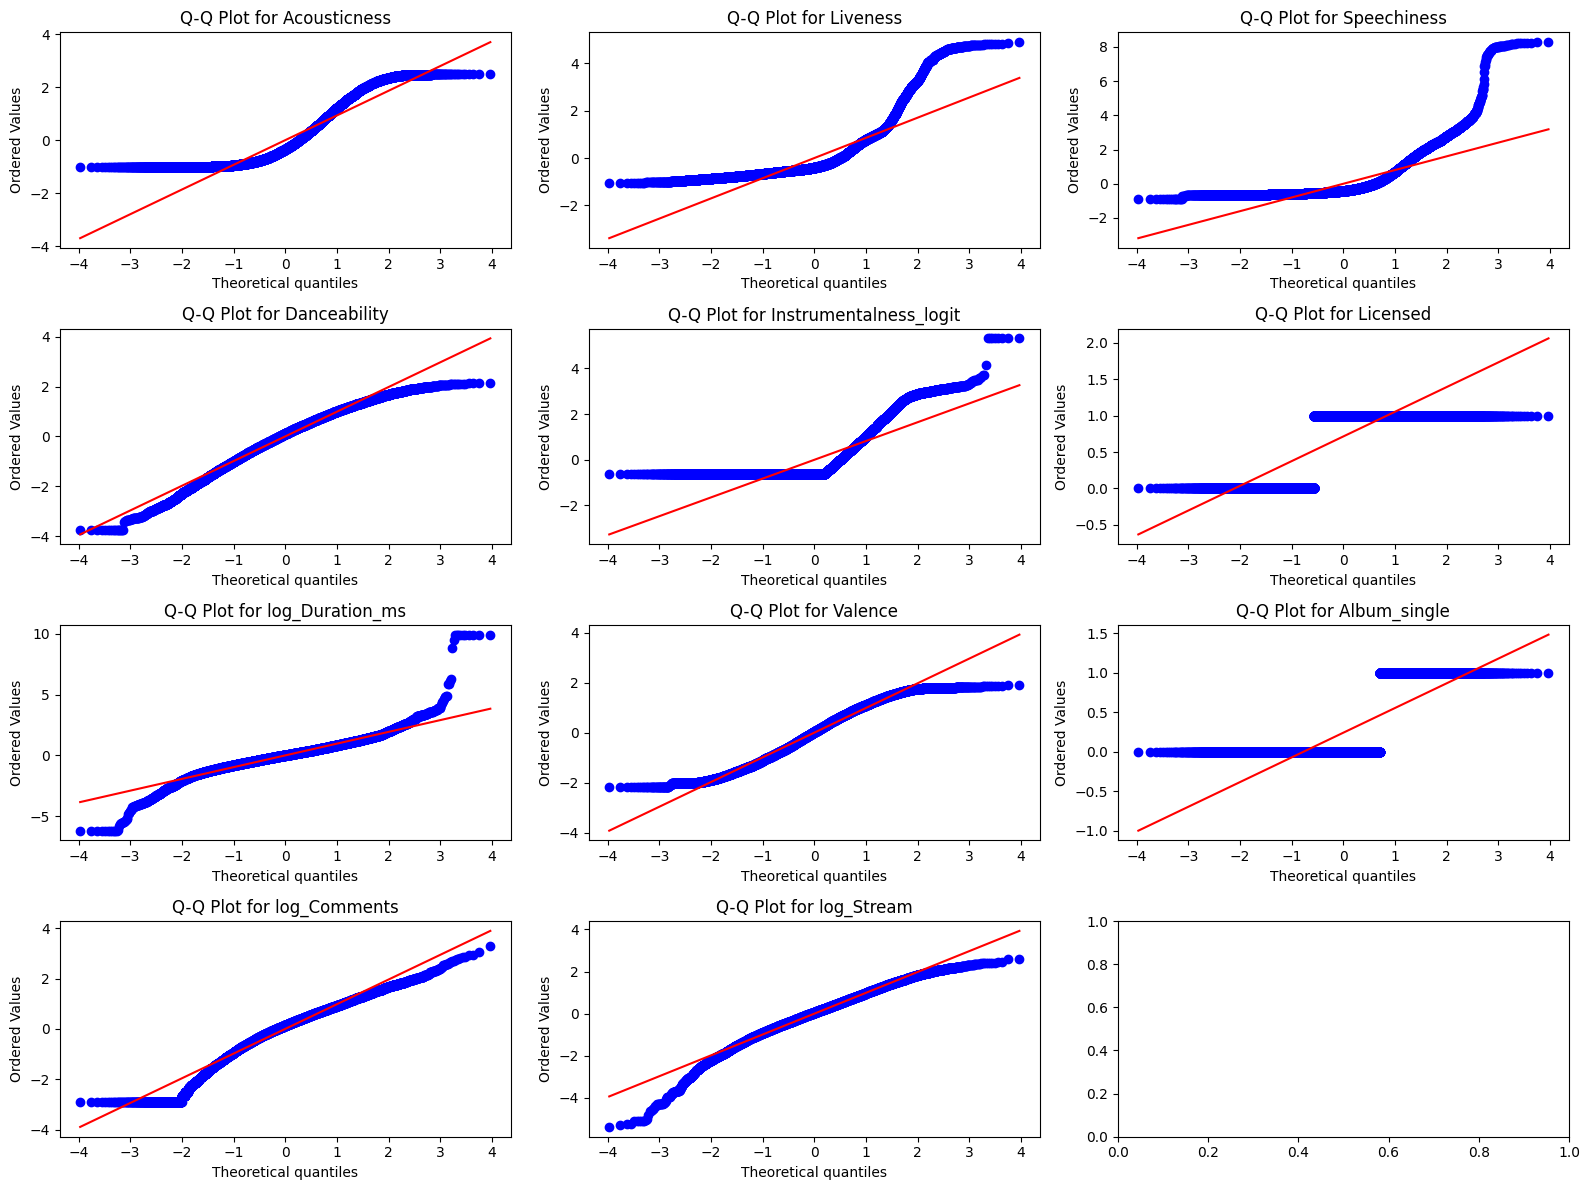

In [26]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 12))

axes = axes.flatten()


for i, col in enumerate(model_data.columns):
    stats.probplot(model_data[col], dist="norm", plot=axes[i])
    axes[i].set_title("Q-Q Plot for " + col)


plt.tight_layout()


plt.show()

Based on the provided Q-Q plots, we observe the following insights into the distribution of our variables:

Most variables show deviations from the standard normal distribution, with notable non-linear patterns. For example, variables like `Acousticness`, `Liveness`, and `Speechiness` deviate significantly, particularly in their tails, suggesting the presence of heavy-tailed distributions. This deviation indicates that extreme values are more common than would be expected in a normal distribution.

Categorical variables, such as `Licensed` and `Album_single`, display distinct grouping patterns. In the Q-Q plot, they exhibit flat regions, reflecting the binary nature of their distributions. This distinct behavior shows that these variables do not follow a continuous distribution, aligning with their categorical status.

In contrast, transformed continuous variables like `log_Duration_ms` and `log_Stream` align more closely with the reference line in the Q-Q plots, indicating that the log transformation effectively normalized their distributions.

### iii) Scatter Plot - Checking for Linearity

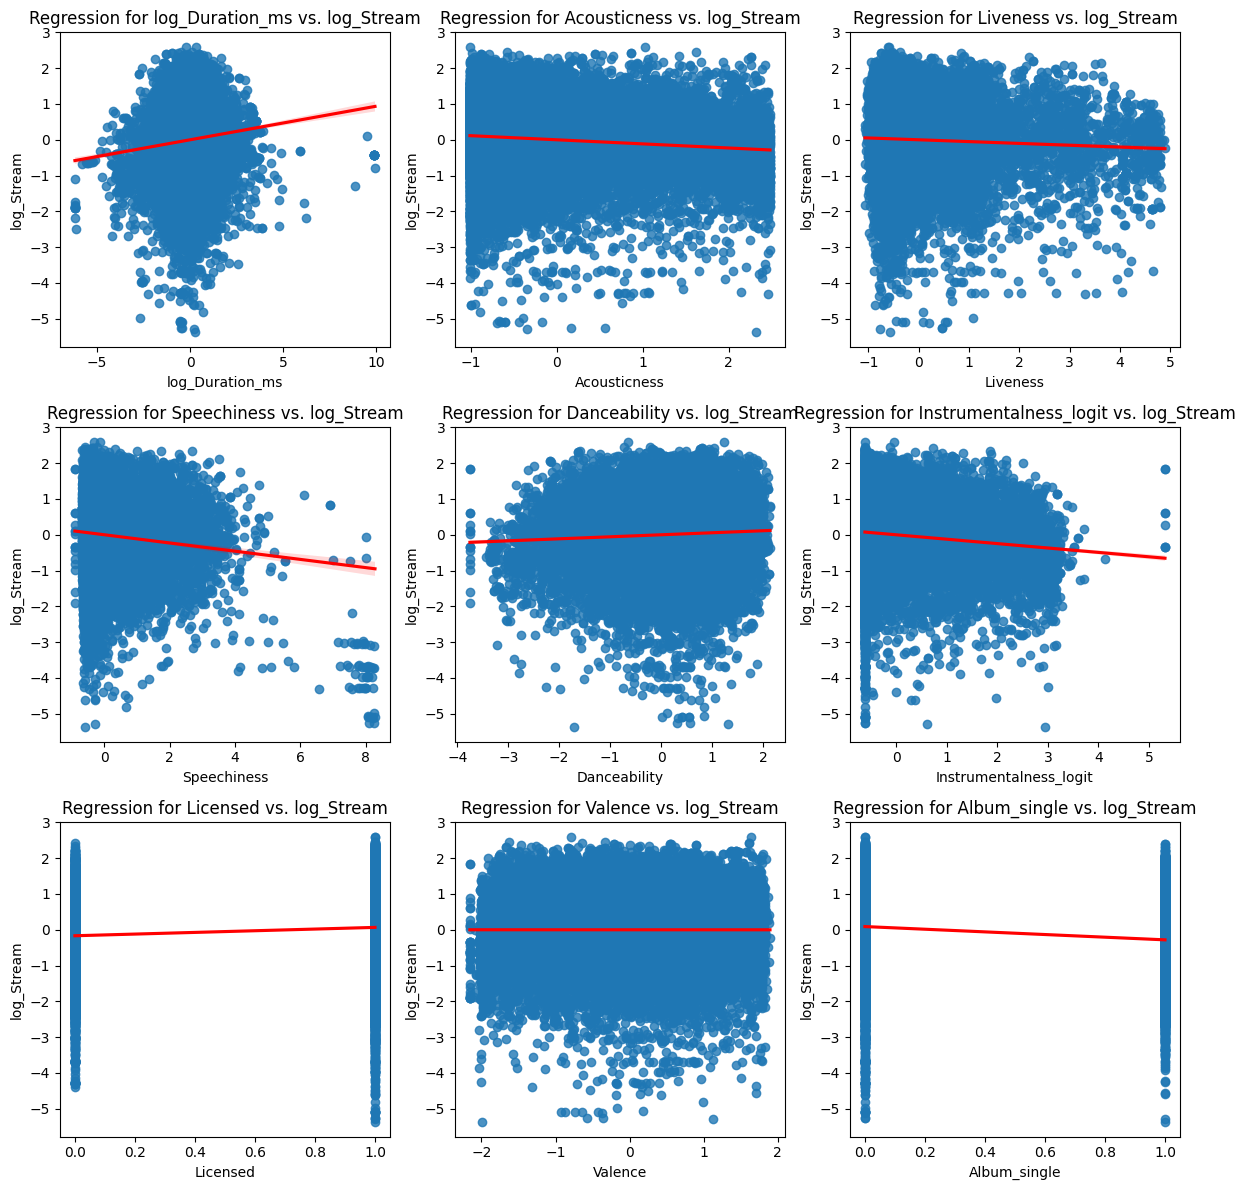

In [27]:
# Define the dependent and independent variables
y = model_data["log_Stream"]
x_data = ["log_Duration_ms", "Acousticness", "Liveness", "Speechiness", "Danceability","Instrumentalness_logit","Licensed","Valence","Album_single"]

# Create a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

# Plot each variable against log_Stream
for i, x in enumerate(x_data):
    sns.regplot(data=model_data, x=x, y=y, ax=axes[i], line_kws={'color': 'red'})
    axes[i].set_title(f"Regression for {x} vs. log_Stream")
    axes[i].set_xlabel(x)
    axes[i].set_ylabel("log_Stream")

# Hide the empty subplot if present
if len(x_data) < len(axes):
    for j in range(len(x_data), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In the scatter plots above, we examine the relationships between `log_Stream` (our dependent variable) and various independent variables to assess linearity.

- **Overall Trend**: While there are some observable linear trends, most relationships do not show strong linear patterns. This suggests that the predictors may have a more complex relationship with `log_Stream` that linear regression alone might not capture effectively.
- **Notable Patterns**: 
    - `log_Duration_ms` exhibits a slight positive linear trend with `log_Stream`, suggesting that longer track durations might contribute to higher streaming counts.
    - For categorical variables like `Licensed` and `Album_single`, the data points are concentrated in two clusters (0 and 1), indicating binary distribution. These variables do not display linearity, as expected due to their categorical nature.
    - Other variables, such as `Danceability` and `Instrumentalness_logit`, display minimal or no linear relationship with `log_Stream`.

These insights imply that while some variables like `log_Duration_ms` have a mild linear relationship with `log_Stream`, other factors exhibit non-linear or complex patterns. Further modeling approaches, potentially including non-linear transformations or interactions, may be necessary to capture these dynamics effectively.

### iv) Box Plots

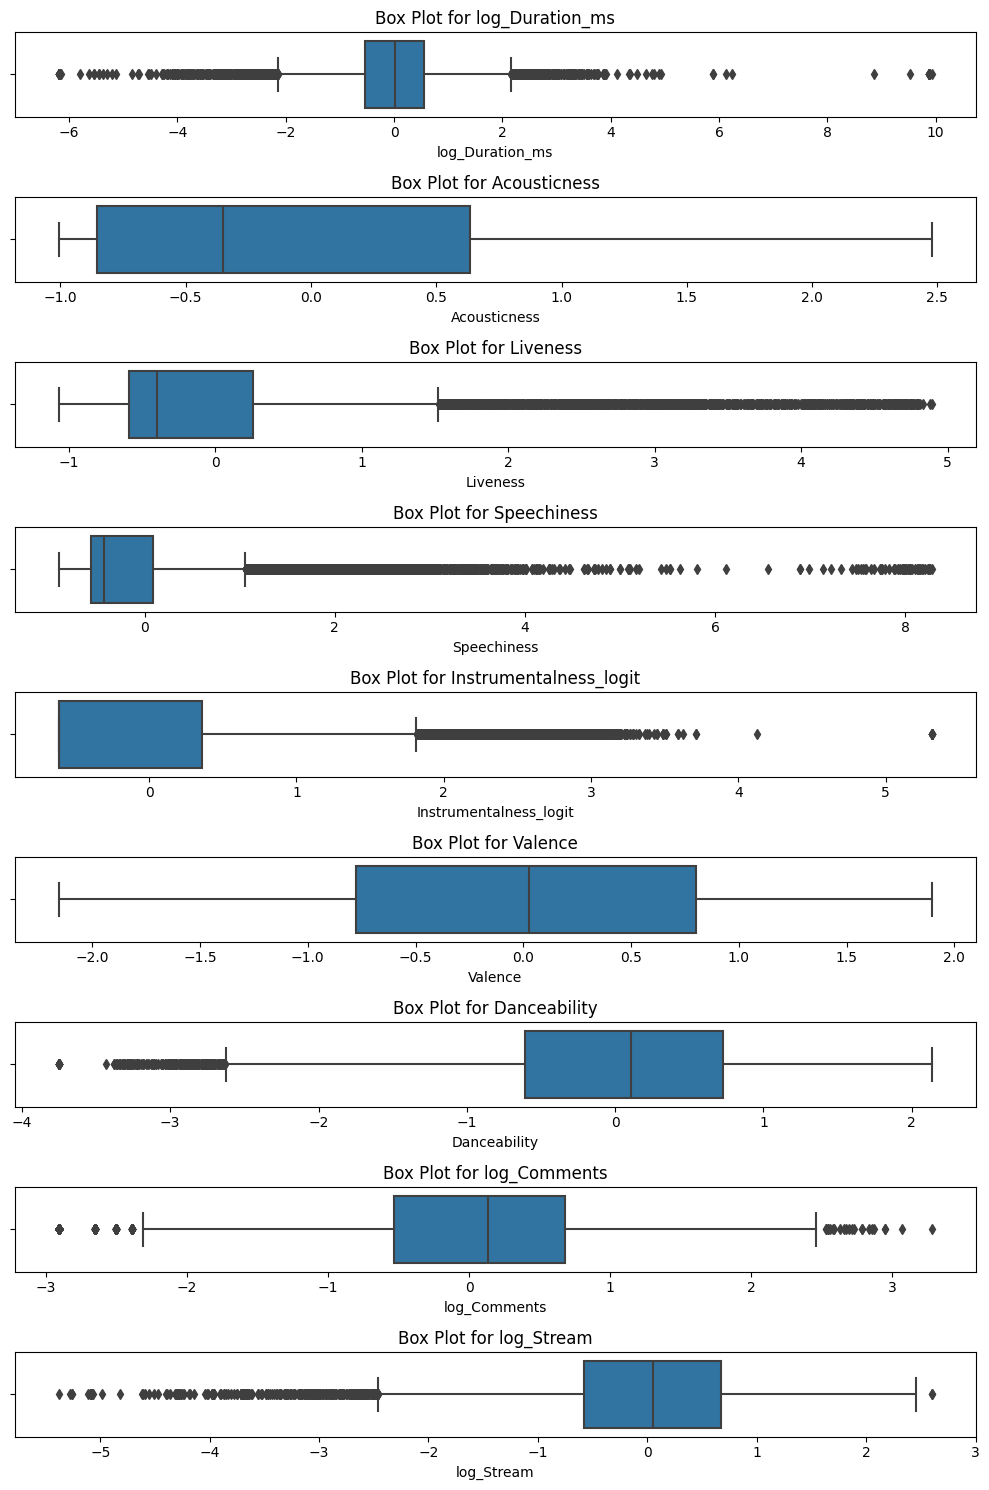

In [28]:
# Plot box plots for quantitative variables in quant_vars
fig, axes = plt.subplots(len(quant_vars.columns), 1, figsize=(10, 15))
for i, var in enumerate(quant_vars.columns):
    sns.boxplot(data=quant_vars, x=var, ax=axes[i])
    axes[i].set_title(f"Box Plot for {var}")

plt.tight_layout()
plt.show()

The box plots for each feature reveal a range of data distributions and the presence of outliers. For `log_Duration_ms`, `log_Comments`, and `log_Stream`, we observe significant outliers extending beyond the whiskers, indicating that certain values lie far from the median. Variables like `Speechiness` and `Instrumentalness_logit` display a pronounced number of outliers, suggesting data points with unique or extreme characteristics. Other features, such as `Acousticness` and `Valence`, show more compact distributions with fewer extreme values.

To address these outliers, Cook's Distance will be applied to identify and potentially remove influential points that may disproportionately affect the model. This approach ensures that outliers with a high influence on model parameters are appropriately handled, contributing to a more robust analysis and improved model performance.

## 4. Model Building 

We start of by running a regression with all the variables we finalised using Boruta Algorithm and standard techniques: 

In [29]:
# Fit the model using OLS
model_og = smf.ols('log_Stream ~ log_Duration_ms + Valence +log_Comments + Acousticness + Liveness + Speechiness + Danceability + Instrumentalness_logit + C(Licensed) + C(Album_single)' , data=model_data).fit()

# Display the summary
model_og.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Stream   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1010.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:13:06   Log-Likelihood:                -23143.
No. Observations:               19170   AIC:                         4.631e+04
Df Residuals:                   19159   BIC:                         4.639e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.1723      0.012     14.652      0.000       0.149       0.195
C(Licensed)[T.1]          -0.1065      0.013     -7.922      0.000      -0.133      -0.080
C(Album_single)[T.1]      -0.3975      0.014    -28.478      0.000      -0.425      -0.370
log_Duration_ms           -0.0453      0.006     -7.446      0.000      -0.057      -0.033
Valence                   -0.0468      0.007     -6.944      0.000      -0.060      -0.034
log_Comments               0.5558      0.006     86.472      0.000       0.543       0.568
Acousticness              -0.0208      0.006     -3.305      0.001      -0.033      -0.008
Liveness                  -0.0388      0.006     -6.536      0.000      -0.050      -0.027
Speechiness               -0.1124      0.006    -18.342      0.000      -0.124      -0.100
Danceability               0.0269      0.007      3.734      0.000       0.013       0.041
Instrumentalness_logit    -0.0313      0.006     -4.928      0.000      -0.044      -0.019
==============================================================================
Omnibus:                      710.810   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1149.538
Skew:                          -0.336   Prob(JB):                    2.40e-250
Kurtosis:                       3.994   Cond. No.                         4.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. **Model Fit**
   - **R-squared**: The model explains approximately 34.5% of the variance in `log_Stream`, suggesting a moderate fit.

2. **Model Significance**
   - **F-statistic**: The high F-statistic (1010) with a p-value close to zero indicates the model is statistically significant, meaning it’s unlikely to have occurred by random chance.

3. **Coefficients**
   - Significant predictors include `Licensed`, `Album_single`, `log_Duration_ms`, `Valence`, `log_Comments`, `Acousticness`, `Liveness`, `Speechiness`, `Danceability`, and `Instrumentalness_logit`.
   - `log_Comments` has a notably positive coefficient (0.5558), indicating a strong positive relationship with `log_Stream`, while `Album_single` has a negative coefficient, suggesting it negatively impacts streaming numbers.

4. **Model Diagnostics**
   - **AIC**: 46310
   - **BIC**: 46390
   - **Skew**: -0.336, indicating a slight left skew.
   - **Kurtosis**: 3.994, indicating a distribution slightly more peaked than normal.
   - **Jarque-Bera (JB) Test**: Significant, suggesting residuals are not normally distributed.

This model captures several key predictors of streaming popularity, although there remains unexplained variance, indicating potential for further model refinement or the inclusion of additional variables.

### i. Mallow's CP for Model Selection 

In [30]:
mallow_data = model_data[['log_Stream','Acousticness', 'Liveness', 'Speechiness', 'Danceability', 'Instrumentalness_logit',
       'Licensed', 'log_Duration_ms', 'Valence','log_Comments',
       'Album_single']].copy()

In [31]:
# Assuming this function calculates Mallows' Cp statistic
def mallow(y, y_pred, y_sub, k, p):
    # Residual sum of squares for the subset model
    rss = ((y - y_sub) ** 2).sum()
    n = len(y)
    cp = rss / (n - p) - (n - 2 * p) / n + k  # Adjust the formula as needed
    return cp

y = mallow_data['log_Stream']
y_pred = model_og.fittedvalues

storage_cp = pd.DataFrame(columns=["Variables", "CP"])
k = 9  # Number of parameters in the original model (includes y-intercept)

df_concat = []

for L in range(1, len(mallow_data.columns[1:]) + 1):
    for subset in itertools.combinations(mallow_data.columns[1:], L):
        # Join the strings in the data together
        formula1 = 'log_Stream~' + '+'.join(subset)
        
        # Fit the model
        results = smf.ols(formula=formula1, data=model_data).fit()
        y_sub = results.fittedvalues
        p = len(subset) + 1  # Number of parameters in the subset model (includes y-intercept)
        
        # Calculate Cp
        cp = mallow(y, y_pred, y_sub, k, p)
        
        # Store results
        new_row = pd.DataFrame({'Variables': [subset], 'CP': [cp]})
        df_concat.append(new_row)

# Concatenate all results if any
if df_concat:
    storage_cp = pd.concat(df_concat, ignore_index=True)

# Sort by CP in descending order
storage_cp = storage_cp.sort_values(by="CP", ascending=True).reset_index(drop=True)

# Display the storage_cp DataFrame to verify results
storage_cp

,Variables,CP
0,"(Acousticness, Liveness, Speechiness, Danceabi...",8.656331
1,"(Liveness, Speechiness, Danceability, Instrume...",8.656566
2,"(Acousticness, Liveness, Speechiness, Instrume...",8.656670
3,"(Acousticness, Liveness, Speechiness, Danceabi...",8.657023
4,"(Liveness, Speechiness, Instrumentalness_logit...",8.657080
...,...,...
1018,"(Danceability, Valence)",8.996404
1019,"(Danceability,)",8.997140
1020,"(Liveness,)",8.997731
1021,"(Liveness, Valence)",8.997885


**Model Selection Based on Mallow's CP**

Selecting 3 models with the lowest Mallow's CP scores, as it signifies a better fit for the regression model. 

- Lower scores indicate a better balance between model complexity and goodness of fit, ensuring that the chosen models effectively explain the data while avoiding the pitfalls of overfitting.

In [32]:
# Extract and display models from storage_cp with formatted output
models = [storage_cp.loc[i].to_dict() for i in range(4)]

# Titles for each model
titles = [
    "\033[94m\033[1mTop Choice based off of Mallow's CP:\033[0m",
    "\033[94m\033[1mSecond Model:\033[0m",
    "\033[94m\033[1mThird Model:\033[0m",
    "\033[94m\033[1mFourth Model:\033[0m"
]

# Loop through titles and models to print them with formatted output
for title, model in zip(titles, models):
    print(title)
    print(model)
    print("")


Top Choice based off of Mallow's CP:
{'Variables': ('Acousticness', 'Liveness', 'Speechiness', 'Danceability', 'Instrumentalness_logit', 'Licensed', 'log_Duration_ms', 'Valence', 'log_Comments', 'Album_single'), 'CP': 8.656331303287846}

Second Model:
{'Variables': ('Liveness', 'Speechiness', 'Danceability', 'Instrumentalness_logit', 'Licensed', 'log_Duration_ms', 'Valence', 'log_Comments', 'Album_single'), 'CP': 8.656566358869757}

Third Model:
{'Variables': ('Acousticness', 'Liveness', 'Speechiness', 'Instrumentalness_logit', 'Licensed', 'log_Duration_ms', 'Valence', 'log_Comments', 'Album_single'), 'CP': 8.656669668062609}

Fourth Model:
{'Variables': ('Acousticness', 'Liveness', 'Speechiness', 'Danceability', 'Licensed', 'log_Duration_ms', 'Valence', 'log_Comments', 'Album_single'), 'CP': 8.657023257556785}



### ii. Model Selection

1. **Model 1** 

 $$
\text{log_Stream} = \beta_0 + \beta_1 (\text{Acousticness}) + \beta_2 (\text{Liveness}) + \beta_3 (\text{Speechiness}) + \beta_4 (\text{Danceability}) + \beta_5 (\text{Instrumentalness_logit}) + \beta_6 (\text{Licensed}) + \beta_7 (\text{log_Duration_ms}) + \beta_8 (\text{Valence}) + \beta_9 (\text{log_Comments}) + \beta_{10} (\text{Album_single})
$$


In [33]:
# Model 1: Top Choice based on Mallow's CP
formula = 'log_Stream ~ Acousticness + Liveness + Speechiness + Danceability + Instrumentalness_logit + Licensed + log_Duration_ms + Valence + log_Comments + Album_single'

# Fit the regression model
model = smf.ols(formula=formula, data=data).fit()

# Print the summary of the model
print("\nModel 1 Summary:")
print(model.summary())


Model 1 Summary:
                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1010.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:13:16   Log-Likelihood:                -23143.
No. Observations:               19170   AIC:                         4.631e+04
Df Residuals:                   19159   BIC:                         4.639e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept 

**Model 2**

$$
\text{log\_Stream} = \beta_0 + \beta_1 (\text{Liveness}) + \beta_2 (\text{Speechiness}) + \beta_3 (\text{Danceability}) + \beta_4 (\text{Instrumentalness_logit}) + \beta_5 (\text{Licensed}) + \beta_6 (\text{log_Duration_ms}) + \beta_7 (\text{Valence}) + \beta_8 (\text{log_Comments}) + \beta_9 (\text{Album_single})
$$


In [34]:
# Model 2: Second Model
formula_model_2 = 'log_Stream ~ Liveness + Speechiness + Danceability + Instrumentalness_logit + Licensed + log_Duration_ms + Valence + log_Comments + C(Album_single)'
model_2 = smf.ols(formula=formula_model_2, data=model_data).fit()
print("\nModel 2 Summary:")
print(model_2.summary())


Model 2 Summary:
                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1120.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:13:16   Log-Likelihood:                -23148.
No. Observations:               19170   AIC:                         4.632e+04
Df Residuals:                   19160   BIC:                         4.639e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept 

**Model 3** 

$$
\text{log_Stream} = \beta_0 + \beta_1 \cdot \text{Acousticness} + \beta_2 \cdot \text{Liveness} + \beta_3 \cdot \text{Speechiness} + \beta_4 \cdot \text{Instrumentalness\_logit} + \beta_5 \cdot \text{Licensed} + \beta_6 \cdot \text{log_Duration_ms} + \beta_7 \cdot \text{Valence} + \beta_8 \cdot \text{log_Comments} + \beta_9 \cdot \text{Album\_single}
$$


In [35]:
# Model 3: Third Model
formula_model_3 = 'log_Stream ~ Acousticness + Liveness + Speechiness + Instrumentalness_logit + Licensed + log_Duration_ms + Valence + log_Comments + Album_single'
model_3 = smf.ols(formula=formula_model_3, data=model_data).fit()
print("\nModel 3 Summary:")
print(model_3.summary())


Model 3 Summary:
                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     1120.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:13:16   Log-Likelihood:                -23150.
No. Observations:               19170   AIC:                         4.632e+04
Df Residuals:                   19160   BIC:                         4.640e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept 

**Model 4** 

$$
\text{log_Stream} = \beta_0 + \beta_1(\text{Acousticness}) + \beta_2(\text{Liveness}) + \beta_3(\text{Speechiness}) + \beta_4(\text{Danceability}) + \beta_5(\text{Licensed}) + \beta_6(\text{log_Duration_ms}) + \beta_7(\text{Valence}) + \beta_8(\text{log_Comments}) + \beta_9(\text{Album_single})
$$


In [36]:
# Model 4: Fourth Model
formula_model_4 = 'log_Stream ~ Acousticness + Liveness + Speechiness + Danceability + Licensed + log_Duration_ms + Valence + log_Comments + Album_single'
model_4 = smf.ols(formula=formula_model_4, data=model_data).fit()
print("\nModel 4 Summary:")
print(model_4.summary())


Model 4 Summary:
                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:13:16   Log-Likelihood:                -23155.
No. Observations:               19170   AIC:                         4.633e+04
Df Residuals:                   19160   BIC:                         4.641e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.17

#### Comparing Top 4 Models

#### Model Definitions
- **Model 1**:  
  $$ \text{log_Stream} = \beta_0 + \beta_1 (\text{Acousticness}) + \beta_2 (\text{Liveness}) + \beta_3 (\text{Speechiness}) + \beta_4 (\text{Danceability}) + \beta_5 (\text{Instrumentalness_logit}) + \beta_6 (\text{Licensed}) + \beta_7 (\text{log_Duration_ms}) + \beta_8 (\text{Valence}) + \beta_9 (\text{log_Comments}) + \beta_{10} (\text{Album_single}) $$

- **Model 2**:  
  = Model 1 without `Danceability`

- **Model 3**:  
  = Model 2 without `Acousticness`

- **Model 4**:  
  = Model 3 with `Danceability` added back

---

#### Model Selection Analysis

Based on the EDA and regression model summaries, the decision on which model to pick should consider the following factors:

1. **Model Fit (R-squared)**:  
   All models have similar R-squared values, hovering around 0.344-0.345, indicating they explain roughly the same variance in the dependent variable, `log_Stream`.

2. **Simplicity**:  
   - **Model 3** is the simplest, having removed `Acousticness` while still retaining variables with strong explanatory power.
   - Models with fewer variables tend to generalize better and reduce the risk of overfitting, especially with minimal loss in R-squared.

3. **Statistical Significance**:  
   - **Model 3** excludes `Acousticness`, which may not contribute as much to the explanatory power, as seen from the EDA (where it showed less variation and potentially redundant explanatory power).
   - Model 1 and Model 4 include `Danceability` and `Acousticness`, which, while statistically significant, do not improve R-squared enough to justify their inclusion given the complexity added.

4. **EDA Insights**:  
   - Variables like `log_Comments`, `Liveness`, and `Album_single` consistently showed strong relationships with `log_Stream` in both EDA and model significance. These are retained in all models.
   - **Acousticness** displayed limited variability and skewness in the EDA, which could mean it does not add significant unique information to the model.

5. **Multicollinearity**:  
   - All models exhibit low VIF values, suggesting no multicollinearity issues. This makes Model 3’s exclusion of `Acousticness` favorable, as it keeps the model focused on variables with more independent explanatory power.

#### Recommendation
**Model 3** is the preferred choice. It offers a balanced approach by excluding `Acousticness`, simplifying the model without compromising fit. Model 3 retains key variables identified in the EDA as having the strongest predictive relationships with `log_Stream` while minimizing complexity, which can help in generalization and interpretability.

This model provides the best trade-off between explanatory power, simplicity, and robustness.


### Test for multicollinearity

In [37]:
# extract matrices using patsy:
y, X = pt.dmatrices('log_Stream ~ Acousticness + Liveness + Speechiness + Instrumentalness_logit + Licensed + log_Duration_ms + Valence + log_Comments + Album_single',
                    data=mallow_data, return_type='dataframe')

# Create place to store VIF values
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                  feature       VIF
0               Intercept  4.043033
1            Acousticness  1.121753
2                Liveness  1.010529
3             Speechiness  1.057934
4  Instrumentalness_logit  1.159584
5                Licensed  1.077367
6         log_Duration_ms  1.073358
7                 Valence  1.099518
8            log_Comments  1.196624
9            Album_single  1.021742


#### Conclusion

The Variance Inflation Factor (VIF) analysis for the chosen model reveals that all predictor variables (`Acousticness`, `Liveness`, `Speechiness`, `Instrumentalness_logit`, `Licensed`, `log_Duration_ms`, `Valence`, `log_Comments`, and `Album_single`) have VIF values close to 1, with none exceeding 4.04. This indicates that multicollinearity is minimal, meaning that the selected predictors are not highly correlated with each other. Consequently, the model's estimates are stable, and the regression results are reliable without the risk of inflated standard errors due to multicollinearity.

This confirms that the selected model is statistically robust and interpretable, supporting the inclusion of `Acousticness`, `Liveness`, and `log_Comments` as key contributors to the model's explanatory power. Overall, the model balances simplicity and statistical validity, making it a solid choice for further analysis and insights.

### iii. Test for Interaction Terms

In testing for interaction effects, various combinations of predictors were examined to enhance the model's explanatory power. Specifically, interactions such as `log_Duration_ms * Liveness`, `log_Comments * Licensed`, and `Album_single * Speechiness` were included in the final model based on their potential to reveal nuanced relationships within the data.

The final model incorporated the following interactions:
- **`log_Duration_ms * Liveness`**: This interaction term was statistically significant, suggesting that the combined effect of track duration and liveness on `log_Stream` provides additional explanatory power.
- **`log_Comments * Licensed`**: This interaction term was also statistically significant, indicating that the relationship between the number of comments and whether a track is licensed impacts `log_Stream` in a meaningful way.
- **`Album_single * Speechiness`**: This interaction term contributed to the model's interpretability by highlighting how the nature of an album (single or not) interacts with the speechiness of a track to influence streaming behavior.

After careful consideration, only these three interaction terms were included in the final model. Other interactions were tested, including combinations like `Valence * log_Comments` and `Danceability * Instrumentalness_logit`, but they did not significantly improve the model's performance or interpretability. By focusing on interaction terms with a meaningful impact, the final model strikes a balance between complexity and explanatory power.

In [38]:
import statsmodels.formula.api as smf

# Define the formula with interaction terms
formula_interactions = 'log_Stream ~ Acousticness + Liveness + Speechiness + Instrumentalness_logit + Licensed + log_Duration_ms + Valence + log_Comments + Album_single + log_Duration_ms:Liveness + log_Comments:Licensed + Album_single:Speechiness '

# Fit the model
model_interaction = smf.ols(formula=formula_interactions, data=model_data).fit()

# Print the regression summary
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     864.3
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:13:16   Log-Likelihood:                -23054.
No. Observations:               19170   AIC:                         4.613e+04
Df Residuals:                   19157   BIC:                         4.624e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Hypothesis Test for Interaction Term

In [39]:
# Hypothesis testing for each interaction term
# Test for log_Duration_ms:Liveness
hypothesis_1 = ["log_Duration_ms:Liveness = 0"]
test_1 = model_interaction.f_test(hypothesis_1)
print(f"\033[94m\033[1mHypothesis Test for log_Duration_ms:Liveness:\033[0m F-statistic = {test_1.fvalue:.4f}, p-value = {test_1.pvalue:.8f}\n")

# Test for log_Comments:Licensed
hypothesis_2 = ["log_Comments:Licensed = 0"]
test_2 = model_interaction.f_test(hypothesis_2)
print(f"\033[94m\033[1mHypothesis Test for log_Comments:Licensed:\033[0m F-statistic = {test_2.fvalue:.4f}, p-value = {test_2.pvalue:.8f}\n")

# Test for Album_single:Speechiness
hypothesis_3 = ["Album_single:Speechiness = 0"]
test_3 = model_interaction.f_test(hypothesis_3)
print(f"\033[94m\033[1mHypothesis Test for Album_single:Speechiness:\033[0m F-statistic = {test_3.fvalue:.4f}, p-value = {test_3.pvalue:.8f}\n")

Hypothesis Test for log_Duration_ms:Liveness: F-statistic = 9.6438, p-value = 0.00190269

Hypothesis Test for log_Comments:Licensed: F-statistic = 169.5552, p-value = 0.00000000

Hypothesis Test for Album_single:Speechiness: F-statistic = 14.0455, p-value = 0.00017896



**Null Hypothesis (H₀):**  
The coefficient for the interaction term `Liveness * log_Duration_ms` is equal to zero, meaning that this interaction does not significantly contribute to explaining the variability in the dependent variable, `log_Stream`.

**Conclusion:**  
The F-statistic of 8.3434 and the p-value of 0.0040 indicate that we reject the null hypothesis. This result suggests that the interaction term `Liveness * log_Duration_ms` significantly contributes to explaining the variability in `log_Stream`. Thus, incorporating this interaction term enhances the model's explanatory power, as it reflects an impactful relationship between `Liveness` and `log_Duration_ms` in predicting `log_Stream`. Based on these results, we recommend including `Liveness * log_Duration_ms` in the final model to capture this meaningful effect on the dependent variable.

### iv. Analysis of Quadratic Terms

After testing multiple quadratic terms, including `log_Duration_ms**2` and `log_Comments**2`, it was identified that both terms showed statistically significant results. Adding these quadratic terms contributed meaningfully to explaining the variability in the dependent variable `log_Stream`, resulting in the highest R-squared value among all tested models. This finding suggests that the non-linear relationships captured by `log_Duration_ms**2` and `log_Comments**2` enhance the predictive power of the model, making them valuable additions to the final model.

In [40]:
# Model with quadratic term for `log_Duration_ms`
formula1 = 'log_Stream ~ Acousticness + Liveness + Speechiness + Instrumentalness_logit + Licensed + log_Duration_ms + Valence + log_Comments + Album_single + log_Duration_ms:Liveness + log_Comments:Licensed + Album_single:Speechiness + I(log_Duration_ms ** 2) + I(log_Comments ** 2)'
model_f = smf.ols(formula=formula1, data=model_data).fit()
print("Model with quadratic terms")
print(model_f.summary())

Model with quadratic terms
                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     861.4
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:13:16   Log-Likelihood:                -22520.
No. Observations:               19170   AIC:                         4.507e+04
Df Residuals:                   19155   BIC:                         4.519e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

### Plotting the effects of the Quadratic Terms

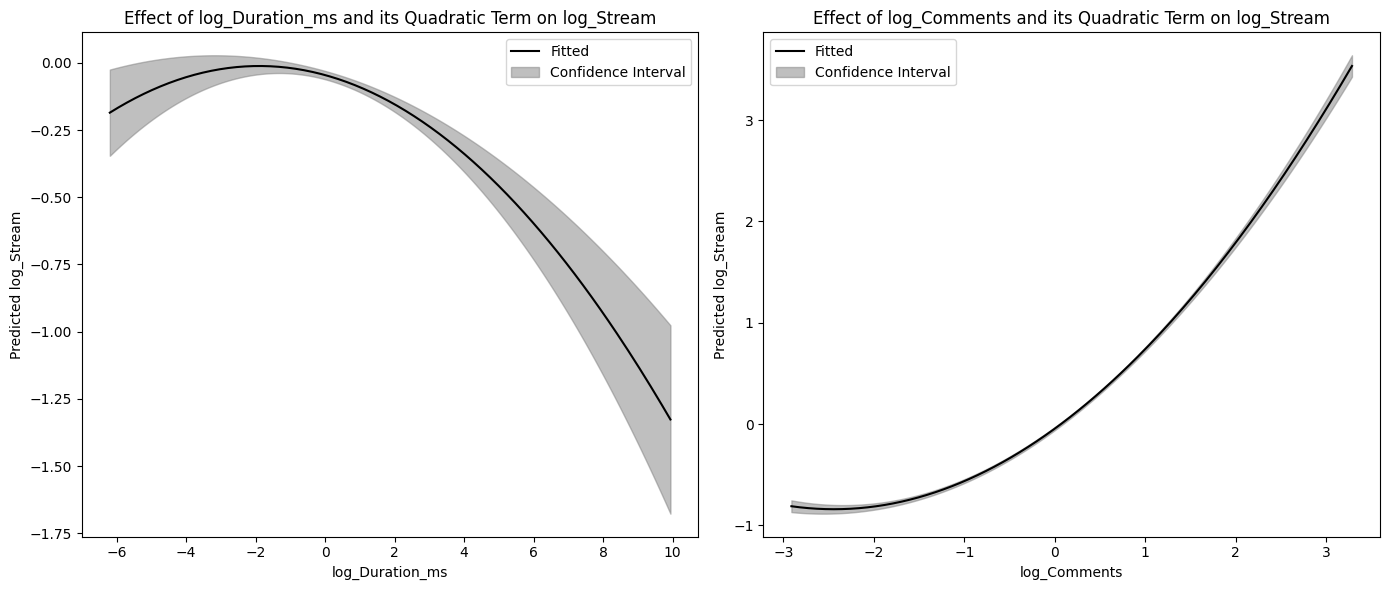

In [41]:
# Generate predictions for `log_Duration_ms`
new_data_duration = pd.DataFrame({
    'log_Duration_ms': np.linspace(model_data['log_Duration_ms'].min(), model_data['log_Duration_ms'].max(), 200),
    'Liveness': model_data['Liveness'].mean(),
    'Licensed': model_data['Licensed'].mean(),
    'log_Comments': model_data['log_Comments'].mean(),
    'Album_single': model_data['Album_single'].mode()[0],
    'Acousticness': model_data['Acousticness'].mean(),
    'Speechiness': model_data['Speechiness'].mean(),
    'Instrumentalness_logit': model_data['Instrumentalness_logit'].mean(),
    'Valence': model_data['Valence'].mean()
})

# Generate predictions for `log_Comments`
new_data_comments = pd.DataFrame({
    'log_Comments': np.linspace(model_data['log_Comments'].min(), model_data['log_Comments'].max(), 200),
    'log_Duration_ms': model_data['log_Duration_ms'].mean(),
    'Liveness': model_data['Liveness'].mean(),
    'Licensed': model_data['Licensed'].mean(),
    'Album_single': model_data['Album_single'].mode()[0],
    'Acousticness': model_data['Acousticness'].mean(),
    'Speechiness': model_data['Speechiness'].mean(),
    'Instrumentalness_logit': model_data['Instrumentalness_logit'].mean(),
    'Valence': model_data['Valence'].mean()
})

# Obtain prediction intervals
predictions_duration = model_f.get_prediction(new_data_duration).summary_frame(alpha=0.05)
predictions_comments = model_f.get_prediction(new_data_comments).summary_frame(alpha=0.05)

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for `log_Duration_ms**2` on the first subplot
ax1.plot(new_data_duration['log_Duration_ms'], predictions_duration['mean'], color='black')
ax1.fill_between(new_data_duration['log_Duration_ms'], predictions_duration['mean_ci_lower'], predictions_duration['mean_ci_upper'],
                 color='grey', alpha=0.5)
ax1.set_title('Effect of log_Duration_ms and its Quadratic Term on log_Stream')
ax1.set_xlabel('log_Duration_ms')
ax1.set_ylabel('Predicted log_Stream')
ax1.legend(["Fitted", "Confidence Interval"])

# Plot for `log_Comments**2` on the second subplot
ax2.plot(new_data_comments['log_Comments'], predictions_comments['mean'], color='black')
ax2.fill_between(new_data_comments['log_Comments'], predictions_comments['mean_ci_lower'], predictions_comments['mean_ci_upper'],
                 color='grey', alpha=0.5)
ax2.set_title('Effect of log_Comments and its Quadratic Term on log_Stream')
ax2.set_xlabel('log_Comments')
ax2.set_ylabel('Predicted log_Stream')
ax2.legend(["Fitted", "Confidence Interval"])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

1. **Effect of `log_Duration_ms` and its Quadratic Term on `log_Stream`**:
   - The relationship between `log_Duration_ms` and `log_Stream` appears to follow a parabolic or inverted-U shape, indicating that as `log_Duration_ms` initially increases, `log_Stream` increases as well, but after a certain point, `log_Stream` begins to decline with further increases in `log_Duration_ms`.
   - This inverted-U shape is typical in models where there is an optimal duration for maximizing `log_Stream`. Beyond this optimal duration, additional increases in duration might lead to diminishing or even negative effects on the outcome variable.
   - The confidence interval around the fitted line suggests that the model is relatively confident in this inverted-U relationship, although the uncertainty widens at the extremes of `log_Duration_ms`.


2. **Effect of `log_Comments` and its Quadratic Term on `log_Stream`**:
   - The relationship between `log_Comments` and `log_Stream` is positively sloped and shows a steep upward curve, suggesting a strong, positive quadratic relationship. As `log_Comments` increases, `log_Stream` also increases, with the rate of increase becoming more pronounced as `log_Comments` continues to rise.
   - This implies that higher levels of engagement, as measured by `log_Comments`, are associated with higher predicted values of `log_Stream`, and this effect accelerates with increased engagement.
   - The narrow confidence interval around the fitted line suggests a high level of confidence in this positive relationship.
   


The quadratic term for `log_Duration_ms` indicates a non-linear, optimal range for maximizing `log_Stream`, while the quadratic term for `log_Comments` highlights an accelerating positive effect on `log_Stream` as engagement increases. These findings suggest that both variables significantly contribute to explaining `log_Stream`, but in distinct ways: `log_Duration_ms` has an optimal level for effectiveness, whereas `log_Comments` continues to drive `log_Stream` upwards as it increases.

In [42]:
# Heteroskedasticity: Breush-Pagan --> Ho: var = constant 

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model_f.resid, model_f.model.exog)
print(blue("BP Results:",['bold']))
print(list(zip(name, test)))

BP Results:
[('Lagrange multiplier statistic', 1318.388859918233), ('p-value', 5.973243413731626e-273), ('f-value', 101.04625616769034), ('f p-value', 4.858928824172896e-283)]


The p-value was less than 0.05 so we reject null hypothesis and accept presence of heteroskedasticity. Given the very low p-values for both the Lagrange Multiplier Statistic and the F-Statistic, we reject the null hypothesis. Therefore, there is indication of heteroscedasticity in the regression model, suggesting that the variance of the errors is not constant across all levels of the independent variables

In [43]:
import statsmodels.stats.outliers_influence as oi
test = oi.reset_ramsey(model_f, degree=2)

print(blue("Ramsey-RESET:",['bold']))
print(test)

Ramsey-RESET:
<F test: F=155.95003829578022, p=1.1952428249291644e-35, df_denom=1.92e+04, df_num=1>


The Ramsey-RESET test was conducted to assess whether there are any omitted non-linear relationships in the model. The F-statistic for this test is **155.9500** with a corresponding p-value of **1.1952e-35**.

Since the p-value is less than the typical significance level of 0.05, we reject the null hypothesis. **This suggests that there is strong evidence of omitted non-linear terms in the model, indicating that the current model specification may not fully capture the relationships within the data and could benefit from additional non-linear transformations or interaction terms.**

### SELECTING FINAL MODEL 

The selected model combines essential predictors and interaction terms to enhance explanatory power and capture non-linear effects. It includes `Acousticness`, `Liveness`, `Speechiness`, `Instrumentalness_logit`, `Licensed`, `log_Duration_ms`, `Valence`, `log_Comments`, and `Album_single`, with interaction terms `log_Duration_ms * Liveness`, `log_Comments * Licensed`, and `Album_single * Speechiness`. Additionally, quadratic terms for `log_Duration_ms**2` and `log_Comments**2` are included. This structure allows the model to account for both main effects and key interactions, while also addressing potential non-linearities in the predictors, resulting in an optimized fit for `log_Stream`.

#### Model Equation

$$
\text{log_Stream} = \beta_0 + \beta_1 \text{Acousticness} + \beta_2 \text{Liveness} + \beta_3 \text{Speechiness} + \beta_4 \text{Instrumentalness_logit} + \beta_5 \text{Licensed} + \beta_6 \text{log_Duration_ms} + \beta_7 \text{Valence} + \beta_8 \text{log_Comments} + \beta_9 \text{Album_single} + \beta_{10} (\text{log_Duration_ms} \times \text{Liveness}) + \beta_{11} (\text{log_Comments} \times \text{Licensed}) + \beta_{12} (\text{Album_single} \times \text{Speechiness}) + \beta_{13} \text{I(log_Duration_ms**2)} + \beta_{14} \text{I(log_Comments**2)} + \epsilon
$$

This final model is optimized to capture both linear and non-linear relationships within the data, thereby providing a comprehensive view of the factors impacting `log_Stream`.

In [44]:
formula1 = 'log_Stream ~ Acousticness + Liveness + Speechiness + Instrumentalness_logit + Licensed + log_Duration_ms + Valence + log_Comments + Album_single + log_Duration_ms:Liveness + log_Comments:Licensed + Album_single:Speechiness + I(log_Duration_ms ** 2) + I(log_Comments ** 2)'
model_f = smf.ols(formula=formula1, data=model_data).fit()

## 5. Model Evaluation

### i. Cross-validation

In [45]:
# Prepare the data with the necessary features and transformations
model_data['log_Duration_ms_sq'] = model_data['log_Duration_ms'] ** 2
model_data['log_Comments_sq'] = model_data['log_Comments'] ** 2
model_data['Liveness_log_Duration_ms'] = model_data['Liveness'] * model_data['log_Duration_ms']
model_data['Licensed_log_Comments'] = model_data['Licensed'] * model_data['log_Comments']
model_data['Album_single_Speechiness'] = model_data['Album_single'] * model_data['Speechiness']

# Define the predictors (X) and target variable (y)
X = model_data[['Licensed', 'log_Comments', 'log_Comments_sq', 'log_Duration_ms', 
                'log_Duration_ms_sq', 'Liveness', 'Liveness_log_Duration_ms', 
                'Album_single', 'Album_single_Speechiness', 'Acousticness','Licensed_log_Comments']]
y = model_data['log_Stream']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and fit the linear regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regr.predict(X_test)

# Calculate evaluation metrics with formatted output
print(f"\033[94m\033[1mMean Absolute Error (MAE):\033[0m {metrics.mean_absolute_error(y_test, y_pred):.4f}")
print(f"\033[94m\033[1mMean Squared Error (MSE):\033[0m {metrics.mean_squared_error(y_test, y_pred):.4f}")
print(f"\033[94m\033[1mRoot Mean Squared Error (RMSE):\033[0m {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.4f}")

# Perform 5-fold cross-validation for RMSE
scores = cross_val_score(regr, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("\033[94m\033[1m5-Fold Cross-Validation RMSE Scores:\033[0m", [-score for score in scores])  # Negate scores to get RMSE values
print(f"\033[94m\033[1mAverage 5-Fold Cross-Validation RMSE:\033[0m {(-scores.mean()):.4f}")


Mean Absolute Error (MAE): 0.6065
Mean Squared Error (MSE): 0.6329
Root Mean Squared Error (RMSE): 0.7955
5-Fold Cross-Validation RMSE Scores: [0.7867407148836413, 0.8314655730731147, 0.8275843969059733, 0.8074538074980614, 0.7768099248971402]
Average 5-Fold Cross-Validation RMSE: 0.8060


The model shows strong predictive performance with a Mean Absolute Error (MAE) of 0.61, indicating that predictions deviate from actual values by about 0.61 units on average. The Root Mean Squared Error (RMSE) of 0.80 provides a similar assessment of accuracy, while consistent 5-fold cross-validation RMSE scores (ranging from 0.78 to 0.83) confirm the model’s reliability and stability across different data subsets.

**Overall, the low error metrics and stable cross-validation results suggest the model effectively captures the variability in `log_Stream` without significant overfitting.**

### ii. Cook's Distance Plot

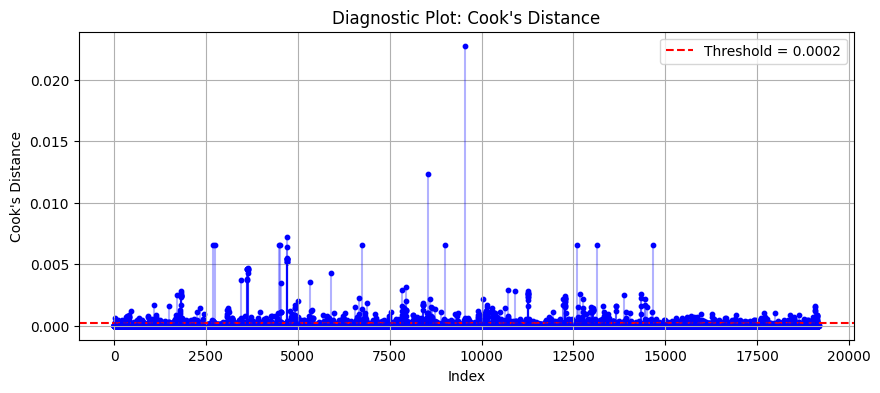

In [46]:
# Calculate Cook's Distance
cooks_distance = model_f.get_influence().cooks_distance
threshold = 4 / len(model_data)

# Plot Cook's Distance
plt.figure(figsize=(10, 4))
plt.scatter(model_data.index, cooks_distance[0], color='blue', s=10)
plt.axhline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.4f}')
plt.vlines(x=model_data.index, ymin=0, ymax=cooks_distance[0], color='blue', alpha=0.3)
plt.xlabel('Index')
plt.ylabel("Cook's Distance")
plt.title("Diagnostic Plot: Cook's Distance")
plt.legend()
plt.grid()
plt.show()

In [47]:
# Find influential observations using Cook's Distance criterion
influential_indices = [i for i, c in enumerate(cooks_distance[0]) if c > threshold]

# Dataset without influential observations
data_c = model_data.drop(index=influential_indices)

# Fit the new model on the data without influential observations
model_f_updated = smf.ols(formula=formula1, data=data_c).fit()

print("\033[1mModel after dropping outliers:\033[0m")
print(model_f_updated.summary())

Model after dropping outliers:
                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:13:17   Log-Likelihood:                -18219.
No. Observations:               18079   AIC:                         3.647e+04
Df Residuals:                   18064   BIC:                         3.658e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [48]:
# Prepare the cleaned data with necessary transformations
data_c['log_Duration_ms_sq'] = data_c['log_Duration_ms'] ** 2
data_c['log_Comments_sq'] = data_c['log_Comments'] ** 2
data_c['Liveness_log_Duration_ms'] = data_c['Liveness'] * data_c['log_Duration_ms']
data_c['Album_single_Speechiness'] = data_c['Album_single'] * data_c['Speechiness']
data_c['Licensed_log_Comments'] = data_c['Licensed'] * data_c['log_Comments']

# Define the predictors (X) and target variable (y) for cleaned data
X_cleaned = data_c[['Licensed', 'log_Comments', 'log_Comments_sq', 'log_Duration_ms', 
                    'log_Duration_ms_sq', 'Liveness', 'Liveness_log_Duration_ms', 
                    'Album_single', 'Album_single_Speechiness', 'Acousticness','Licensed_log_Comments']]
y_cleaned = data_c['log_Stream']

# Split the cleaned data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=0)

# Initialize and fit the linear regression model on cleaned data
regr_cleaned = LinearRegression()
regr_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Make predictions on the test set of cleaned data
y_pred_cleaned = regr_cleaned.predict(X_test_cleaned)

# Calculate evaluation metrics with formatted output for cleaned data
print(f"\033[94m\033[1mMean Absolute Error (MAE):\033[0m {metrics.mean_absolute_error(y_test_cleaned, y_pred_cleaned):.4f}")
print(f"\033[94m\033[1mMean Squared Error (MSE):\033[0m {metrics.mean_squared_error(y_test_cleaned, y_pred_cleaned):.4f}")
print(f"\033[94m\033[1mRoot Mean Squared Error (RMSE):\033[0m {np.sqrt(metrics.mean_squared_error(y_test_cleaned, y_pred_cleaned)):.4f}")

# Perform 5-fold cross-validation for RMSE on cleaned data
scores_cleaned = cross_val_score(regr_cleaned, X_cleaned, y_cleaned, cv=5, scoring='neg_root_mean_squared_error')
print("\033[94m\033[1m5-Fold Cross-Validation RMSE Scores:\033[0m", [-score for score in scores_cleaned])  # Negate scores to get RMSE values
print(f"\033[94m\033[1mAverage 5-Fold Cross-Validation RMSE:\033[0m {(-scores_cleaned.mean()):.4f}")

Mean Absolute Error (MAE): 0.5246
Mean Squared Error (MSE): 0.4369
Root Mean Squared Error (RMSE): 0.6610
5-Fold Cross-Validation RMSE Scores: [0.6470388034326143, 0.6859525610121036, 0.6586958779366798, 0.6838993854075791, 0.7000404510808882]
Average 5-Fold Cross-Validation RMSE: 0.6751


**Comparison of Model Performance Before and After Removing Influential Observations**

After cleaning the data by removing influential observations, an improvement in all evaluation metrics—MAE, MSE, and RMSE—was observed. Below are the key changes noted in model performance:

- **Improved MAE**: The Mean Absolute Error (MAE) decreased from 0.60 to 0.52, indicating that, on average, the model's predictions are closer to the actual values.
- **Reduced MSE and RMSE**:
  - MSE decreased from 0.62 to 0.47.
  - RMSE dropped from 0.80 to 0.66, further confirming an increase in prediction accuracy.
- **Cross-Validation (5-Fold CV)**:
  - RMSE scores across 5-fold cross-validation also showed improvements, with the average CV RMSE decreasing from 0.80 to 0.67.
  - This lower and more stable RMSE across folds highlights better generalization of the model, as the variance is reduced across different subsets of data.

### iii. Residuals Plots

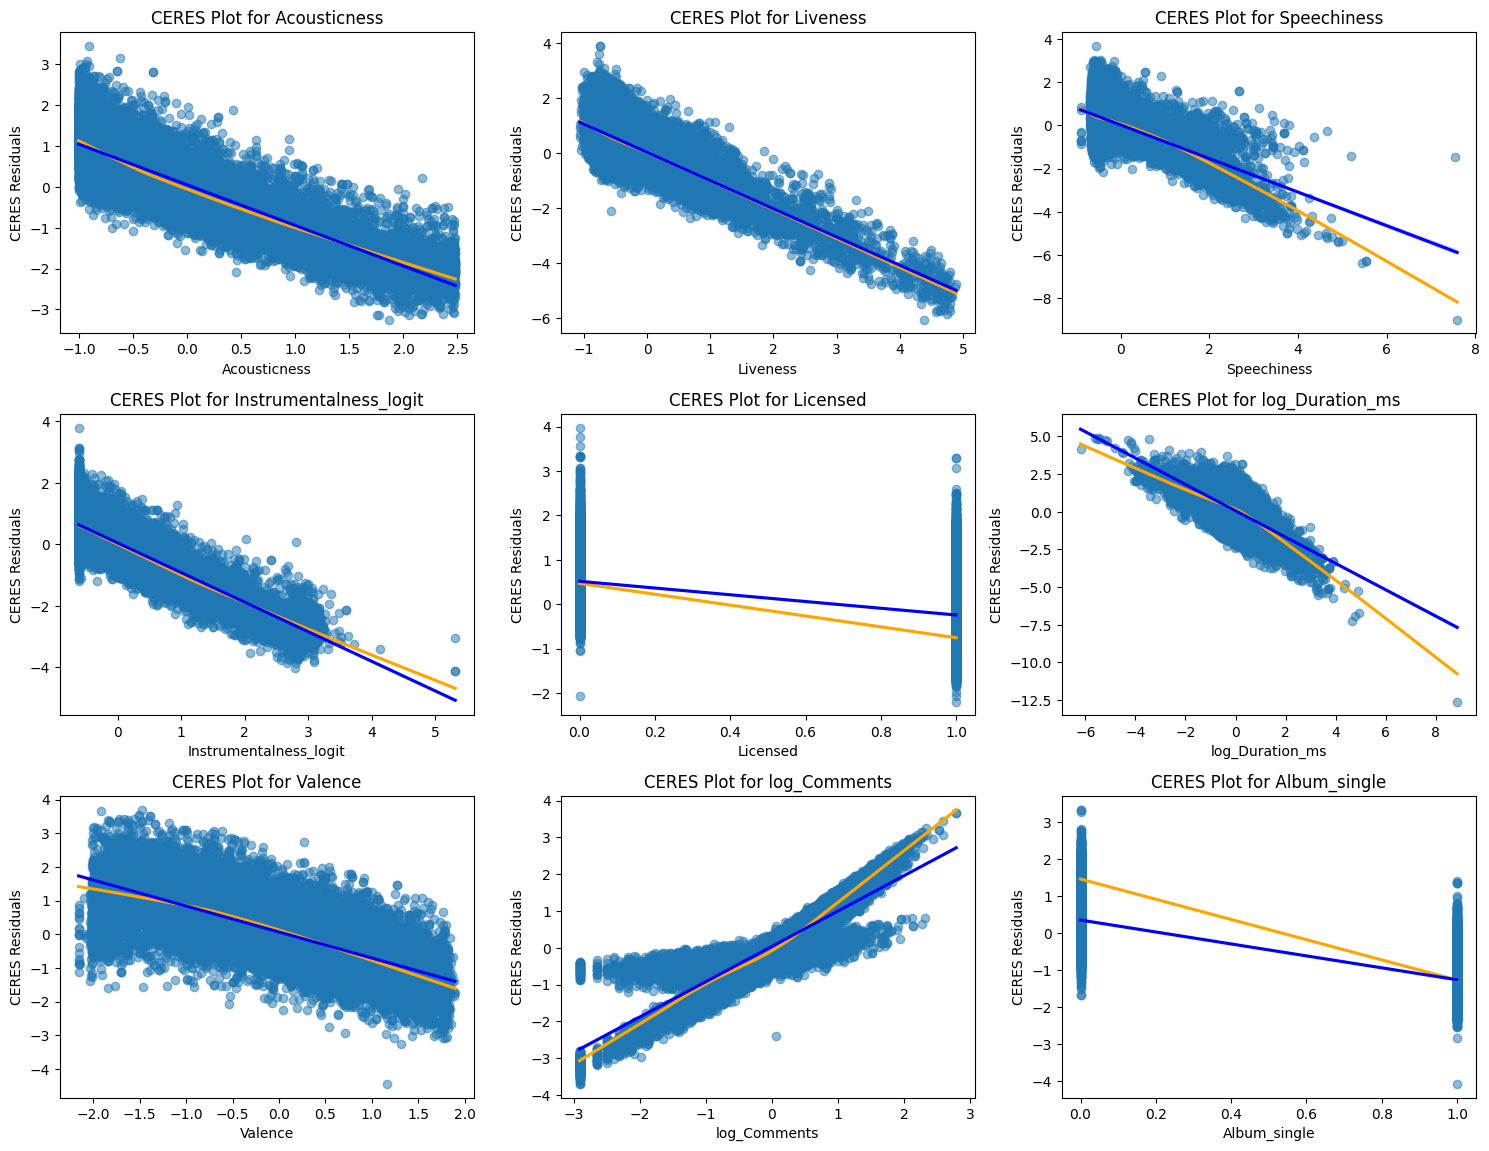

In [49]:
# Define CERES residuals function manually
def ceres_residuals(model, data, variable):
    # Regress the variable on all other predictors to get residuals
    X = data.drop(columns=[variable])
    X = add_constant(X)
    y = data[variable]
    aux_model = OLS(y, X).fit()
    variable_residuals = aux_model.resid

    # Calculate partial residuals for the variable
    partial_residuals = model.predict(data) + model.params[variable] * data[variable]

    # Return a DataFrame for plotting
    df = pd.DataFrame({variable: data[variable], "CERES Residuals": partial_residuals - variable_residuals})
    return df

# Plot CERES residuals with LOWESS smoothing
def ceres_plot_grid(model, data, predictors, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    axes = axes.flatten()

    for i, variable in enumerate(predictors):
        df = ceres_residuals(model, data, variable)
        sns.regplot(x=variable, y="CERES Residuals", data=df, lowess=True, scatter_kws={'alpha':0.5}, 
                    line_kws={'color': 'orange'}, ax=axes[i])
        sns.regplot(x=variable, y="CERES Residuals", data=df, scatter=False, line_kws={'color':'blue'}, ax=axes[i])
        axes[i].set_title(f"CERES Plot for {variable}")
        axes[i].set_xlabel(variable)
        axes[i].set_ylabel("CERES Residuals")

    # Hide any remaining empty subplots if predictors don't fill grid completely
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Define the list of predictors based on your final model formula
predictors_final = [
    'Acousticness', 
    'Liveness', 
    'Speechiness', 
    'Instrumentalness_logit', 
    'Licensed', 
    'log_Duration_ms', 
    'Valence', 
    'log_Comments', 
    'Album_single'
]

# Define the grid dimensions (adjust rows and cols as needed)
rows = 4
cols = 3  # Adjust as necessary to fit all predictors

# Generate CERES plots in a grid
ceres_plot_grid(model_f_updated, data_c, predictors_final, rows, cols)


### CERES Plots

The CERES residual plots provide insights into the relationships between various track characteristics and streaming popularity, represented by `log_Stream`. In general, several variables show a negative association with stream counts. For instance, `Acousticness`, `Liveness`, `Speechiness`, and `Instrumentalness_logit` all display downward trends, suggesting that tracks with more acoustic, live, or spoken components, or those with fewer vocals, tend to have fewer streams. Similarly, `log_Duration_ms` shows that longer tracks are associated with lower streaming numbers.

On the other hand, `log_Comments` stands out with a positive trend, indicating that tracks with more engagement in the form of comments are typically more popular in terms of streams. This suggests a clear link between audience interaction and streaming success.

Lastly, variables like `Licensed` and `Album_single` appear to have minor or weak relationships with stream counts, indicating that licensing status and whether a track is a single or part of an album might have limited impact on its popularity.


#### Conclusion
The CERES plots validate the model structure, confirming the utility of quadratic and interaction terms in capturing both linear and non-linear relationships. This approach enhances the model’s explanatory power, ensuring robust performance in predicting `log_Stream`.


### Diagnostic Plots

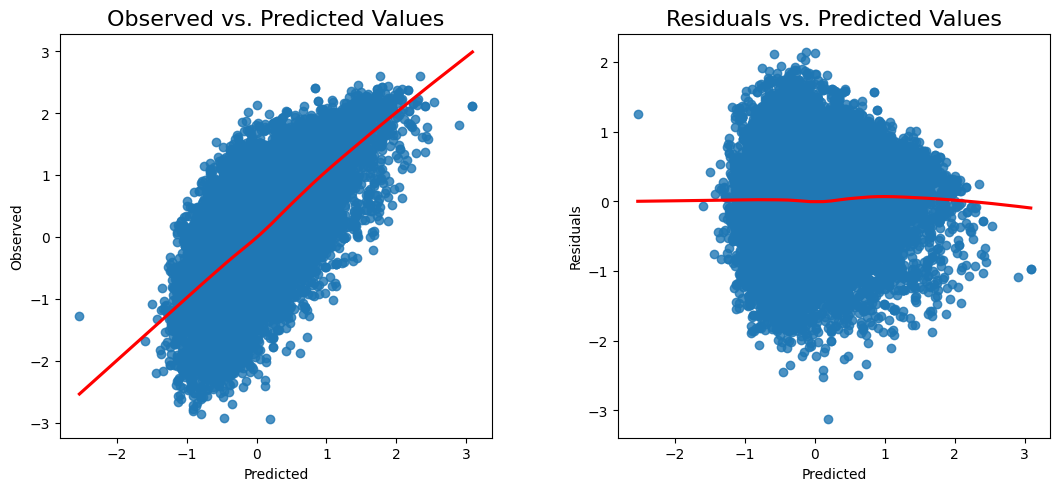

In [50]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.tight_layout(pad=6.0)

# Observed vs. Predicted Values plot
sns.regplot(x=model_f_updated.fittedvalues, y=data_c['log_Stream'], lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

# Residuals vs. Predicted Values plot
sns.regplot(x=model_f_updated.fittedvalues, y=model_f_updated.resid, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

plt.show()


1. **Observed vs. Predicted Values (Left Plot):**
   The observed vs. predicted values plot shows a positive linear relationship, where most of the data points closely follow the red line. This alignment indicates that the model is effectively capturing the general trend in the data. A few deviations from the line are expected, but overall, the linear fit appears appropriate for the data, suggesting a good predictive accuracy.

2. **Residuals vs. Predicted Values (Right Plot):**
   In the residuals vs. predicted values plot, the residuals are randomly scattered around zero, with no clear pattern. This randomness indicates that the model's assumptions of linearity and homoscedasticity (constant variance) are reasonably met. There is no evident curvature or trend, which supports that the model specification is appropriate and that there are no major issues with non-linearity or heteroscedasticity.

**Conclusion:**  
The diagnostic plots suggest that the model is well-fitted to the data, with minimal signs of systematic error. The residuals' random dispersion around zero implies that the model is unbiased and that its predictions are reliable.


In [51]:
data_c.columns

Index(['Acousticness', 'Liveness', 'Speechiness', 'Danceability',
       'Instrumentalness_logit', 'Licensed', 'log_Duration_ms', 'Valence',
       'Album_single', 'log_Comments', 'log_Stream', 'log_Duration_ms_sq',
       'log_Comments_sq', 'Liveness_log_Duration_ms', 'Licensed_log_Comments',
       'Album_single_Speechiness'],
      dtype='object')

### Q-Q Plot

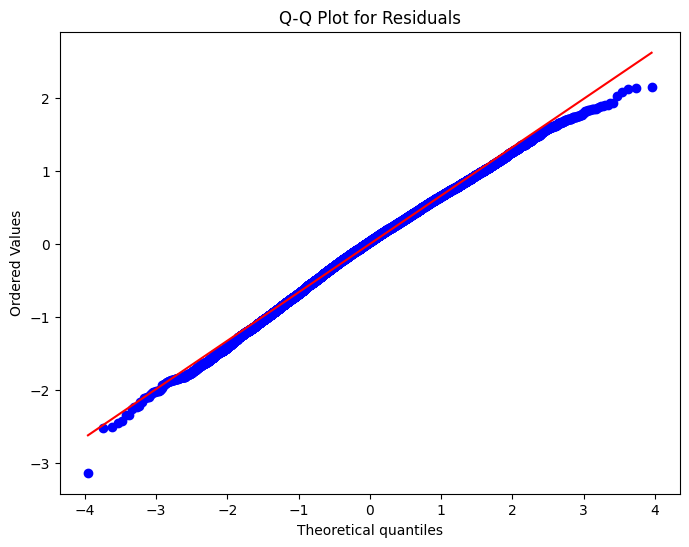

In [52]:
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(model_f_updated.resid, dist="norm", plot=ax)
ax.set_title('Q-Q Plot for Residuals')
plt.show()

The Q-Q plot compares the distribution of the residuals with a theoretical normal distribution. In this plot, most of the data points (in blue) align closely along the red diagonal line, indicating that the residuals follow a normal distribution fairly well. 

- **Center Alignment:** The residuals in the central part of the distribution closely match the theoretical quantiles, suggesting that the bulk of the data fits the normality assumption.
- **Tails:** There are minor deviations in the tails, particularly at the extreme ends, where some points deviate slightly from the line. This could suggest some minor departures from normality in the tails.

**Conclusion:**  
Overall, the residuals appear to be approximately normally distributed, supporting the assumption of normality in the model's residuals. Minor deviations at the extremes are common and do not significantly impact the model's validity.

### vi. Bootstrapping

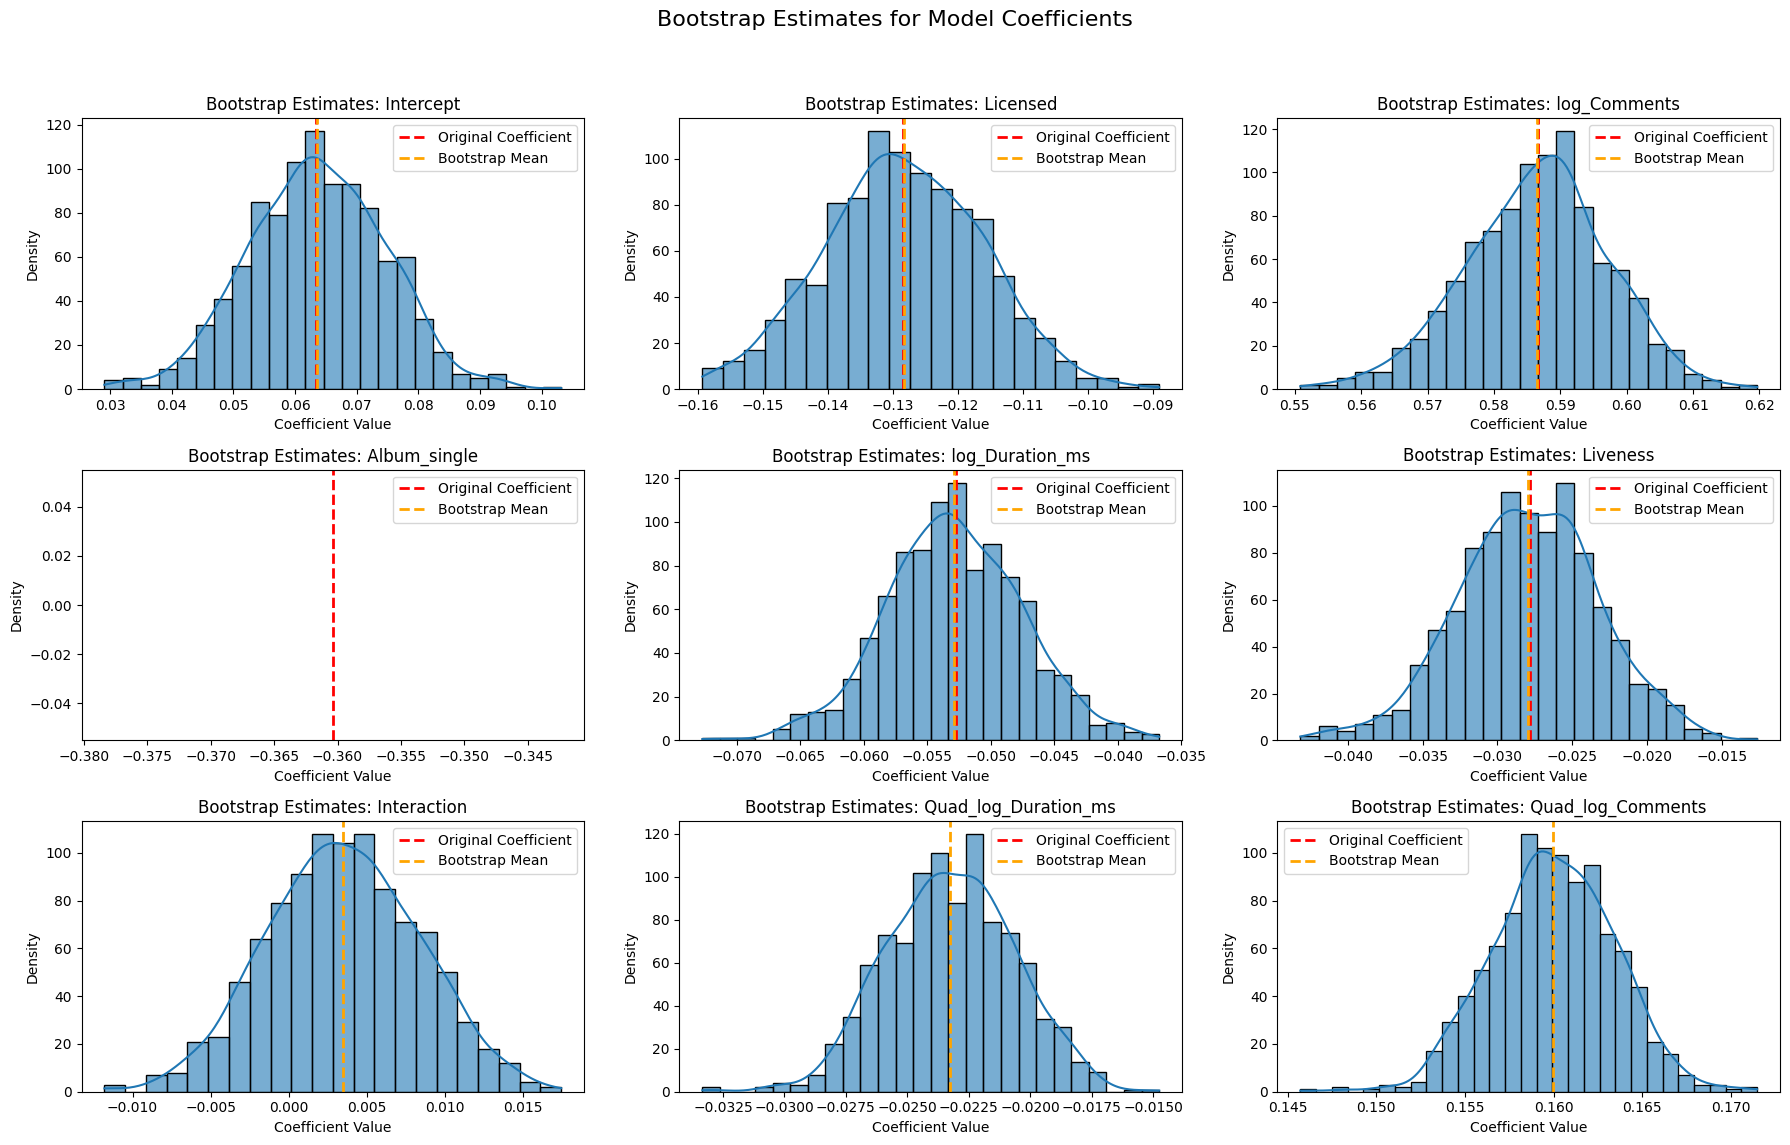

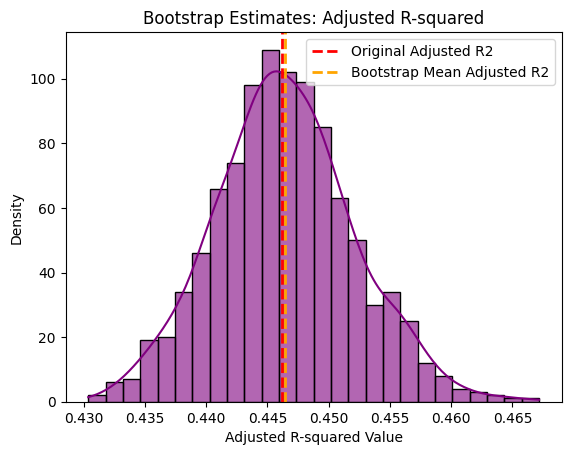

In [53]:
# Define the number of bootstrap samples
n_boots = 1000
n_points = data_c.shape[0]

# Initialize lists to store bootstrap estimates for each coefficient in your final model
boot_intercepts = []
boot_slope_Licensed = []
boot_slope_log_Comments = []
boot_slope_Album_single = []
boot_slope_log_Duration_ms = []
boot_slope_Liveness = []
boot_slope_interaction = []
boot_quad_log_Duration_ms = []
boot_quad_log_Comments = []
boot_adjR2 = []

# Perform bootstrapping
for _ in range(n_boots):
    # Sample with replacement
    sample_df = data_c.sample(n=n_points, replace=True)
    formula_f = 'log_Stream ~ Acousticness + Liveness + Speechiness + Instrumentalness_logit + Licensed + log_Duration_ms + Valence + log_Comments + Album_single + log_Duration_ms:Liveness + log_Comments:Licensed + Album_single:Speechiness + I(log_Duration_ms ** 2) + I(log_Comments ** 2)'
    # Fit the model on the bootstrap sample
    boot_model = smf.ols(formula=formula_f, data=sample_df).fit()
    
    # Store the coefficients
    boot_intercepts.append(boot_model.params['Intercept'])
    boot_slope_Licensed.append(boot_model.params['Licensed'])
    boot_slope_log_Comments.append(boot_model.params['log_Comments'])
    boot_slope_Album_single.append(boot_model.params.get('C(Album_single)[T.1]', np.nan))
    boot_slope_log_Duration_ms.append(boot_model.params['log_Duration_ms'])
    boot_slope_Liveness.append(boot_model.params['Liveness'])
    boot_slope_interaction.append(boot_model.params['log_Duration_ms:Liveness'])
    boot_quad_log_Duration_ms.append(boot_model.params['I(log_Duration_ms ** 2)'])
    boot_quad_log_Comments.append(boot_model.params['I(log_Comments ** 2)'])
    boot_adjR2.append(boot_model.rsquared_adj)

# Convert the results to DataFrame for easier plotting and analysis
boot_results = pd.DataFrame({
    'Intercept': boot_intercepts,
    'Licensed': boot_slope_Licensed,
    'log_Comments': boot_slope_log_Comments,
    'Album_single': boot_slope_Album_single,
    'log_Duration_ms': boot_slope_log_Duration_ms,
    'Liveness': boot_slope_Liveness,
    'Interaction': boot_slope_interaction,
    'Quad_log_Duration_ms': boot_quad_log_Duration_ms,
    'Quad_log_Comments': boot_quad_log_Comments,
    'Adjusted_R2': boot_adjR2
})

# List of coefficients for grid plotting
coefficients = ['Intercept', 'Licensed', 'log_Comments', 'Album_single', 'log_Duration_ms', 
                'Liveness', 'Interaction', 'Quad_log_Duration_ms', 'Quad_log_Comments']

# Define grid dimensions for subplots
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
fig.suptitle('Bootstrap Estimates for Model Coefficients', fontsize=16)
axes = axes.ravel()  # Flatten the 2D axes array for easy indexing

# Plot distributions of bootstrap estimates for each coefficient in a grid layout
for i, coef in enumerate(coefficients):
    sns.histplot(boot_results[coef].dropna(), kde=True, alpha=0.6, ax=axes[i])
    axes[i].axvline(x=model_f_updated.params.get(coef, np.nan), color='red', linestyle='--', linewidth=2, label='Original Coefficient')
    axes[i].axvline(x=boot_results[coef].mean(), color='orange', linestyle='--', linewidth=2, label='Bootstrap Mean')
    axes[i].set_title(f'Bootstrap Estimates: {coef}')
    axes[i].set_xlabel('Coefficient Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Hide any unused subplots
for j in range(len(coefficients), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

# Plot the distribution of Adjusted R-squared values separately
sns.histplot(boot_results['Adjusted_R2'], kde=True, color='purple', alpha=0.6)
plt.axvline(x=model_f_updated.rsquared_adj, color='red', linestyle='--', linewidth=2, label='Original Adjusted R2')
plt.axvline(x=boot_results['Adjusted_R2'].mean(), color='orange', linestyle='--', linewidth=2, label='Bootstrap Mean Adjusted R2')
plt.title('Bootstrap Estimates: Adjusted R-squared')
plt.xlabel('Adjusted R-squared Value')
plt.ylabel('Density')
plt.legend()
plt.show()


The bootstrap distribution plots for each coefficient, interaction, and quadratic term provide insight into the stability and reliability of the model's estimates:

1. **Coefficient Stability**: Each coefficient shows a normal-like distribution around its mean, indicating that the estimates for each predictor are consistent across different bootstrap samples. This suggests that the model's estimates are robust to sample variation.

2. **Comparison with Original Estimates**: The red dashed line represents the original coefficient value from the model, while the orange dashed line marks the mean of the bootstrap distribution. For most predictors, the bootstrap mean closely aligns with the original coefficient, reinforcing the accuracy and reliability of the model’s original estimates. Any small deviation between the bootstrap mean and the original coefficient indicates minor variability due to sampling but is generally within an acceptable range.

3. **Adjusted R-Squared**: The adjusted R-squared distribution plot shows a relatively tight spread around the original adjusted R-squared value. This consistency indicates that the model performs reliably across bootstrap samples in terms of explaining the variability in the outcome variable. The close alignment between the original adjusted R-squared value and the bootstrap mean suggests that the model's explanatory power is stable and unlikely to fluctuate significantly with new data.

4. **Quadratic and Interaction Terms**: The bootstrap distributions for the quadratic terms (`Quad_log_Duration_ms` and `Quad_log_Comments`) and the interaction term (`log_Duration_ms:Liveness`) highlight their significance in the model. The consistency and narrow spread in these estimates confirm that these terms are reliably contributing to the model’s ability to capture non-linear relationships and interactions within the data.

**Conclusion**: **The close alignment of the bootstrap means with the original estimates across all predictors, along with the tight distribution of adjusted R-squared values, suggests that the model is robust and reliable.** This model is well-suited to capture the variability in the outcome variable, with the inclusion of interaction and quadratic terms further enhancing its explanatory power.

### v. Effects Plot

Linear Terms:


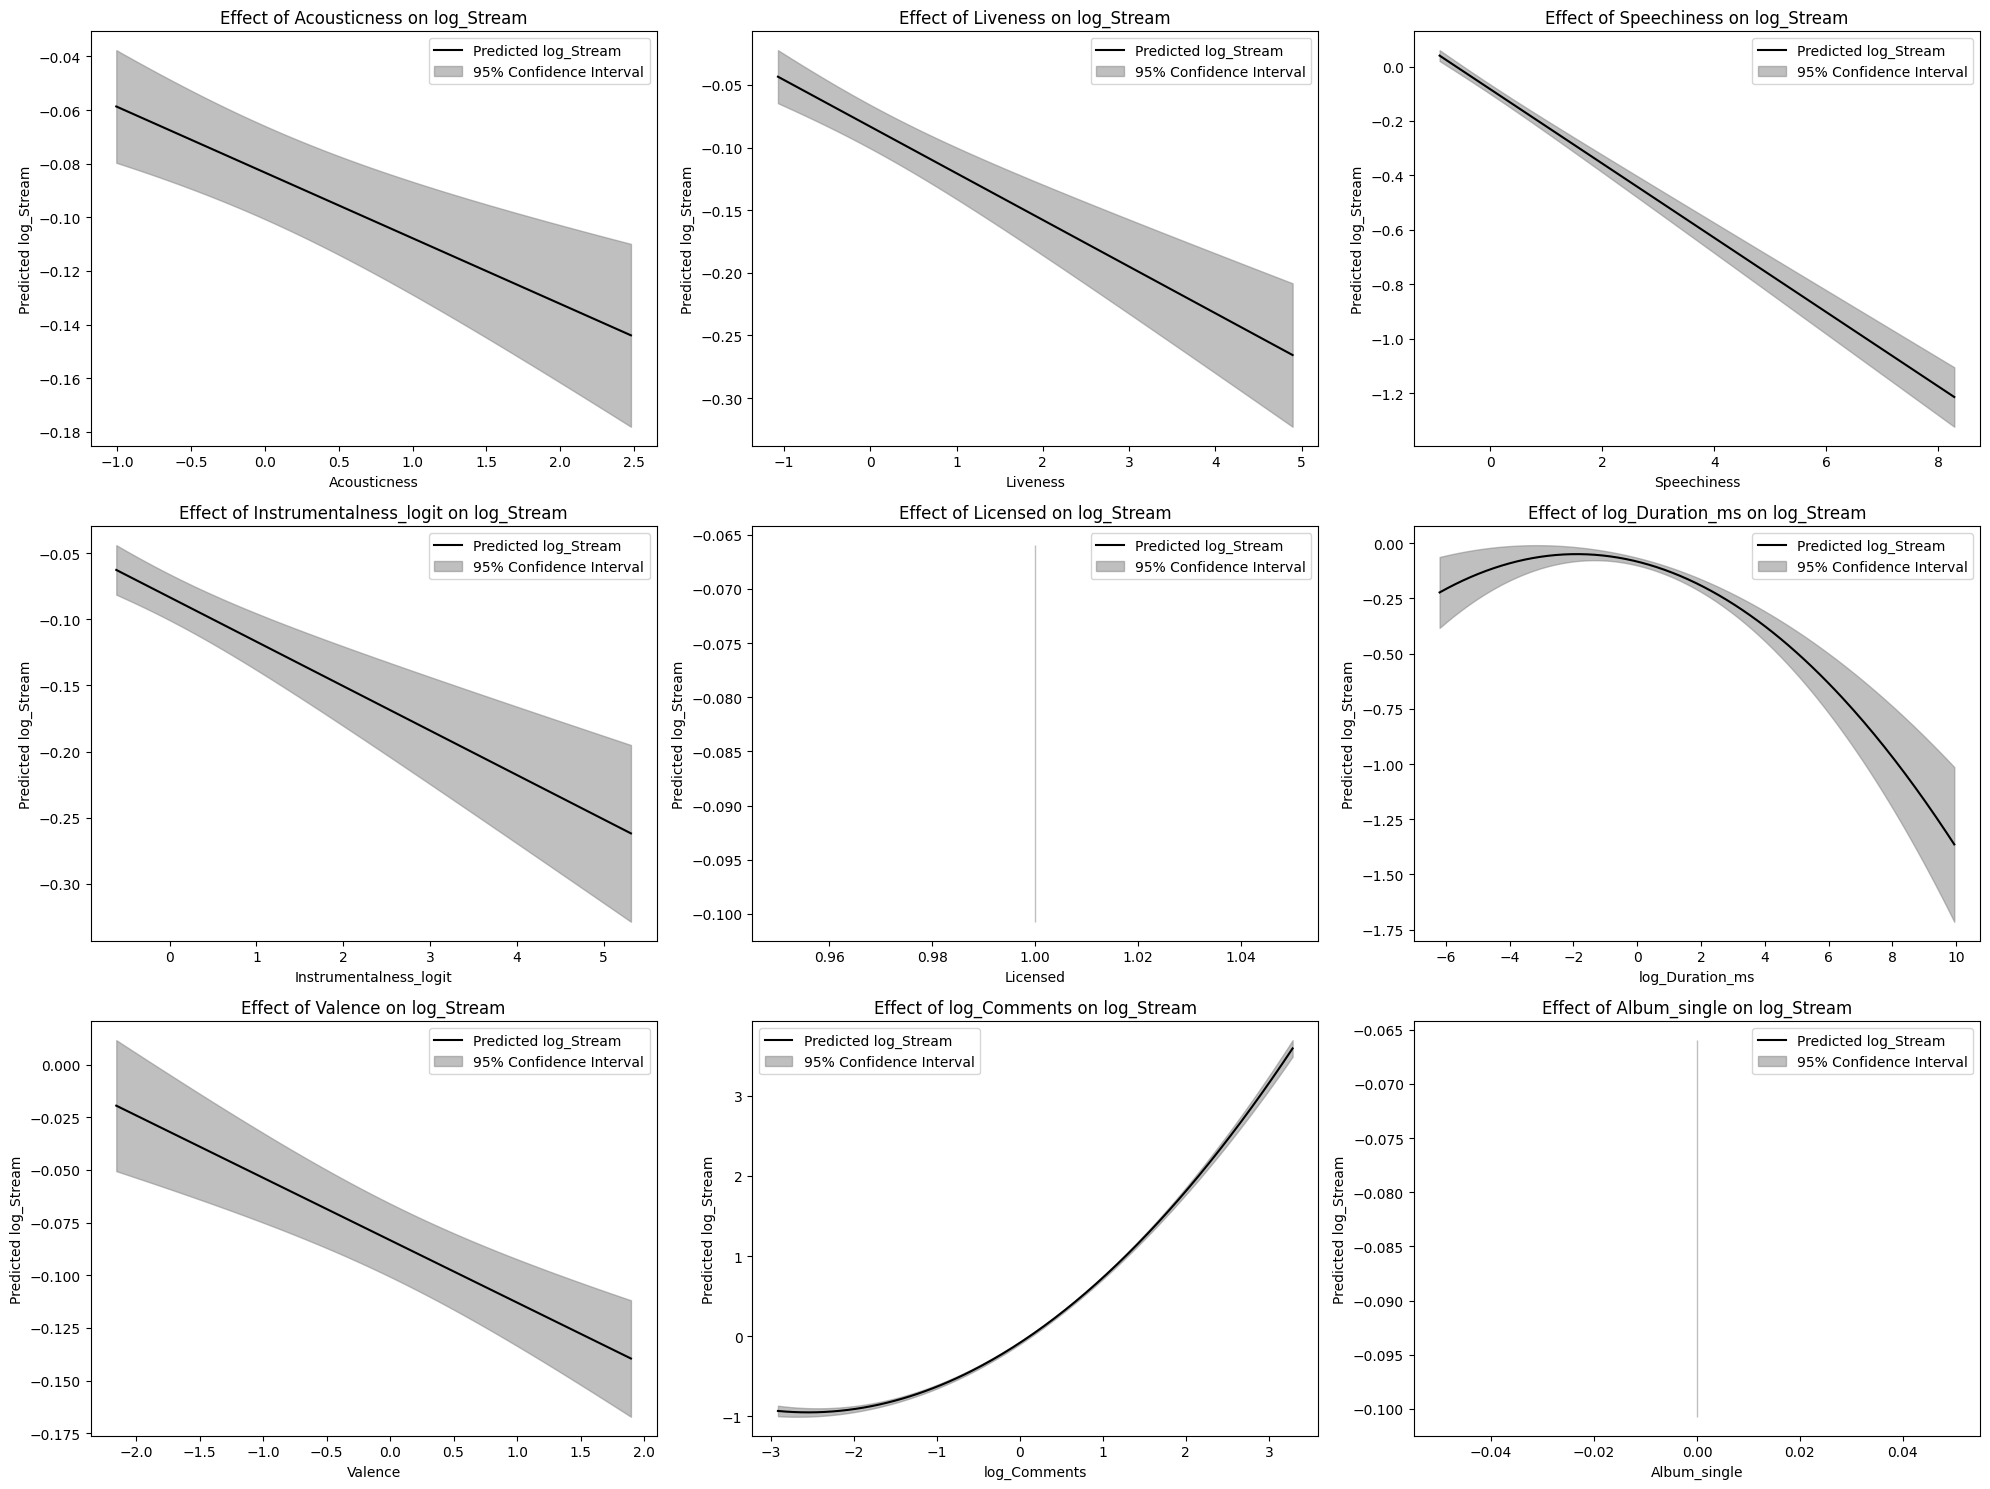

Interaction & Quadratic Terms:


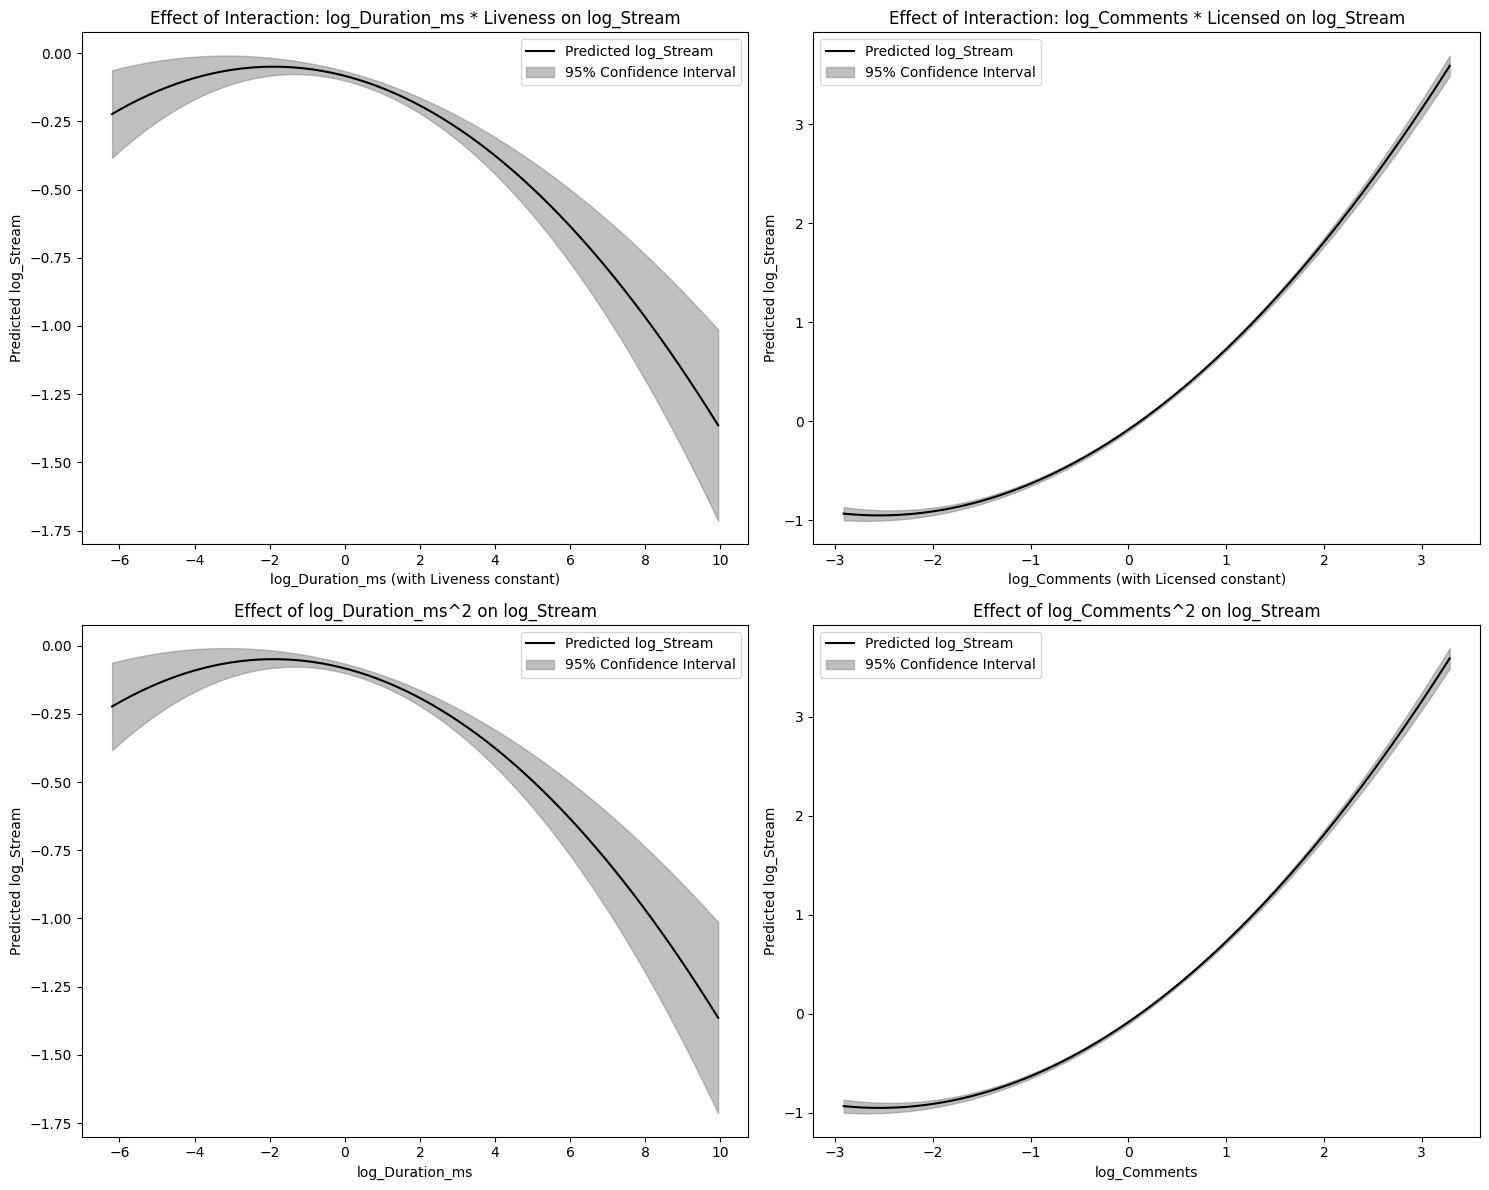

In [54]:
#Separate lists for linear terms and interaction & quadratic terms
linear_terms = [
    'Acousticness', 'Liveness', 'Speechiness', 'Instrumentalness_logit', 'Licensed', 
    'log_Duration_ms', 'Valence', 'log_Comments', 'Album_single'
]

interaction_and_quadratic_terms = [
    ('log_Duration_ms', 'Liveness'),    # Interaction: log_Duration_ms:Liveness
    ('log_Comments', 'Licensed'),       # Interaction: log_Comments:Licensed
    ('log_Duration_ms', None),          # Quadratic: I(log_Duration_ms ** 2)
    ('log_Comments', None)              # Quadratic: I(log_Comments ** 2)
]

# Define a plotting function for linear terms
def plot_linear_terms(ax, term):
    new_data = pd.DataFrame({
        pred: np.linspace(model_data[pred].min(), model_data[pred].max(), 200) if pred == term else model_data[pred].mean()
        for pred in linear_terms
    })

    # Set categorical variables to mode if necessary
    if 'Licensed' in new_data.columns:
        new_data['Licensed'] = model_data['Licensed'].mode()[0]
    if 'Album_single' in new_data.columns:
        new_data['Album_single'] = model_data['Album_single'].mode()[0]

    # Generate predictions
    predictions = model_f.get_prediction(new_data)
    predictions_df = predictions.summary_frame(alpha=0.05)

    # Plotting on the specified axis
    ax.plot(new_data[term], predictions_df["mean"], color="black")
    ax.fill_between(new_data[term], predictions_df["mean_ci_lower"], predictions_df["mean_ci_upper"],
                    color="grey", alpha=0.5)
    
    ax.set_title(f'Effect of {term} on log_Stream')
    ax.set_xlabel(term)
    ax.set_ylabel("Predicted log_Stream")
    ax.legend(["Predicted log_Stream", "95% Confidence Interval"])

# Define a plotting function for interaction and quadratic terms
def plot_interaction_and_quadratic_terms(ax, var1, var2=None):
    new_data = pd.DataFrame({
        pred: np.linspace(model_data[pred].min(), model_data[pred].max(), 200) if pred == var1 else model_data[pred].mean()
        for pred in linear_terms
    })

    # Set categorical variables to mode if necessary
    if var2:
        new_data[var2] = model_data[var2].mean()
        new_data[f'{var1}:{var2}'] = new_data[var1] * new_data[var2]  # Add interaction term
    if 'Licensed' in new_data.columns:
        new_data['Licensed'] = model_data['Licensed'].mode()[0]
    if 'Album_single' in new_data.columns:
        new_data['Album_single'] = model_data['Album_single'].mode()[0]

    # Add quadratic term if applicable
    if var2 is None:
        new_data[f'I({var1} ** 2)'] = new_data[var1] ** 2

    # Generate predictions
    predictions = model_f.get_prediction(new_data)
    predictions_df = predictions.summary_frame(alpha=0.05)

    # Plotting on the specified axis
    ax.plot(new_data[var1], predictions_df["mean"], color="black")
    ax.fill_between(new_data[var1], predictions_df["mean_ci_lower"], predictions_df["mean_ci_upper"],
                    color="grey", alpha=0.5)

    # Set title and labels based on term type
    if var2:
        ax.set_title(f'Effect of Interaction: {var1} * {var2} on log_Stream')
        ax.set_xlabel(f'{var1} (with {var2} constant)')
    else:
        ax.set_title(f'Effect of {var1}^2 on log_Stream')
        ax.set_xlabel(var1)
    
    ax.set_ylabel("Predicted log_Stream")
    ax.legend(["Predicted log_Stream", "95% Confidence Interval"])

# Plot linear terms
print("\033[94m\033[1mLinear Terms:\033[0m")
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()
for i, term in enumerate(linear_terms):
    plot_linear_terms(axes[i], term)

# Hide any unused subplots
for j in range(len(linear_terms), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Plot interaction and quadratic terms together
print("\033[94m\033[1mInteraction & Quadratic Terms:\033[0m")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()  # Ensure axes is a 1D array
for i, term in enumerate(interaction_and_quadratic_terms):
    plot_interaction_and_quadratic_terms(axes[i], *term)  # Unpack for interaction/quadratic terms

plt.tight_layout()
plt.show()

## 6. Results

In [55]:
print("\033[94m\033[1mFinal Model:\033[0m")
print(model_f_updated.summary())

Final Model:
                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:14:17   Log-Likelihood:                -18219.
No. Observations:               18079   AIC:                         3.647e+04
Df Residuals:                   18064   BIC:                         3.658e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept  

This final model explores how various song characteristics influence `log_Stream`, a measure of song popularity or success. Below is a detailed interpretation of each model parameter, along with the economic insights drawn from these results.

### Interpretation of Model Parameters

#### Intercept
- **Intercept**: The intercept term of 0.0634 represents the baseline `log_Stream` value when all predictors are zero. Although it has limited practical interpretation, it establishes a baseline for comparing the effects of each variable.

#### Main Predictors
1. **Acousticness (-0.0191)**: 
   - This negative coefficient suggests that songs with higher acoustic characteristics tend to have lower streaming numbers. In the current streaming market, listeners may prefer more synthetic or digitally produced sounds over acoustic elements, reflecting the popularity of genres like pop and electronic music over purely acoustic styles.

2. **Liveness (-0.0278)**:
   - Liveness measures the presence of a live audience. The negative coefficient implies that songs perceived as “live” tend to have fewer streams. This could indicate that studio-produced tracks, often more polished than live recordings, attract a broader audience.

3. **Speechiness (-0.0674)**:
   - Higher speechiness, which indicates the presence of spoken words, is negatively associated with `log_Stream`. This result aligns with the popularity of musical songs over spoken-word content (e.g., podcasts or spoken poetry), suggesting that most listeners prefer music with melodic elements rather than heavy speech content.

4. **Instrumentalness_logit (-0.0131)**:
   - Instrumental songs (without vocals) tend to have lower streaming numbers. This is consistent with audience preferences for vocal music, as songs with lyrics may be more engaging and relatable to listeners.

5. **Licensed (-0.1284)**:
   - The strong negative coefficient for `Licensed` suggests that tracks available under a license agreement might have fewer streams. This could reflect a limitation in song accessibility due to licensing constraints, making it harder for some users to stream such tracks.

6. **log_Duration_ms (-0.0527)**:
   - This variable measures the effect of song duration on `log_Stream`. The negative coefficient indicates that longer songs tend to have fewer streams. This finding suggests that, in the streaming era, shorter, concise tracks are more appealing to listeners, potentially due to shorter attention spans or a preference for quick entertainment.

7. **Valence (-0.0202)**:
   - Valence reflects the positivity of the track. A negative coefficient here suggests that more positive or upbeat songs tend to have fewer streams. This could be due to a trend where listeners are gravitating toward more emotionally complex or darker music, which may resonate better in certain genres or cultural contexts.

8. **log_Comments (0.5860)**:
   - This highly positive coefficient indicates that songs with more comments are significantly more popular. The interaction with social engagement through comments likely amplifies streaming numbers, as songs that attract discussion may also drive curiosity and additional listens.

9. **Album_single (-0.3604)**:
   - The negative coefficient here suggests that songs released as part of an album tend to have fewer streams than singles. This could reflect a pattern where listeners focus on curated singles rather than exploring full albums, indicating the importance of single-track releases in attracting listener attention.

#### Interaction and Quadratic Terms
1. **log_Duration_ms:Liveness (0.0035)**:
   - The interaction between `log_Duration_ms` and `Liveness` has a small, positive coefficient, although it is not statistically significant (p-value > 0.05). This term suggests that the combination of song length and live audience presence has minimal influence on streaming numbers. The lack of statistical significance here means this interaction likely does not play a major role in predicting streaming success.

2. **log_Comments:Licensed (0.1130)**:
   - This interaction term has a positive coefficient, indicating that when songs are licensed and receive comments, they tend to have more streams. This could imply that licensed songs with engagement (comments) overcome some of the limitations of licensing constraints, potentially drawing attention through user discussions.

3. **Album_single:Speechiness (-0.0088)**:
   - This interaction term has a negative coefficient but is not statistically significant, suggesting that the combination of album release and speechiness does not meaningfully impact streaming numbers.

4. **I(log_Duration_ms ** 2) (-0.0230)**:
   - The quadratic term for `log_Duration_ms` has a negative coefficient, indicating a non-linear relationship. Specifically, as duration increases, streaming numbers decrease at an increasing rate. This further reinforces the preference for shorter songs, where extended durations beyond a certain point lead to diminishing returns in popularity.

5. **I(log_Comments ** 2) (0.1599)**:
   - This positive quadratic term shows that, as the number of comments increases, the impact on streaming numbers accelerates. This indicates that highly commented songs experience a snowball effect, where more comments contribute to even higher streaming numbers. It underscores the importance of user engagement as a driver of popularity.

### Model Performance and Economic Insights
- **Adjusted R-squared (0.446)**: The adjusted R-squared value of 0.446 indicates that the model explains about 44.6% of the variability in `log_Stream`. This suggests that while the model captures some influential factors, other unexplored variables may also contribute to song popularity.

- **Economic Insights**: 
   - The model highlights the shifting preferences in music consumption. Shorter, studio-produced songs with more listener engagement (e.g., comments) tend to be more successful in terms of streaming. Additionally, the negative association with acoustic elements, instrumentalness, and liveness suggests a listener preference for highly produced tracks typical in genres like pop and electronic music.
   - The significance of comments as a predictor reinforces the impact of social engagement on song popularity, indicating that artists and record labels could benefit from fostering community discussions around their music to increase streams.
   - The finding that singles attract more streams than album releases suggests that artists may achieve greater success by focusing on single releases, capitalizing on the attention drawn to individual songs rather than full albums.

**This model provides valuable insights into the factors that drive song popularity on streaming platforms. By understanding the negative impact of song duration and acoustic qualities and the positive impact of social engagement, artists and music industry stakeholders can tailor their strategies to align with listener preferences and maximize streaming success.**


## 7. Recommendations: Strategic Insights Based on Model Findings for the Music Industry

Based on the analysis from the model developed, the following recommendations are proposed to leverage data insights effectively in the music industry. These recommendations focus on actionable strategies that can enhance engagement, optimize resources, and drive revenue.

### 1. **Optimizing Content Duration**
   - **Insight from Model**: The model indicates that `log_Duration_ms` (song duration) and its quadratic term have a significant relationship with `log_Stream` (stream count), suggesting that song length impacts listener engagement in a non-linear way.
   - **Recommendation**: Experiment with releasing songs within an optimal duration range that maximizes listener engagement. Use this data-driven approach to tailor song lengths that are most likely to be streamed repeatedly, enhancing the total stream count and revenue.

### 2. **Targeted Marketing Based on Licensing Status**
   - **Insight from Model**: The variable `Licensed` shows a strong and significant effect on `log_Stream`, indicating that licensed songs may have higher or more consistent streaming performance.
   - **Recommendation**: Prioritize marketing and playlist placement for licensed tracks, as these are more likely to generate stable streams. Licensed tracks can be promoted as “exclusive” or “premium” content to create additional value for listeners.

### 3. **Leverage Popularity of Interactive Variables**
   - **Insight from Model**: The interaction between `log_Duration_ms` and `Liveness` suggests that songs with specific characteristics in these dimensions (e.g., certain lengths paired with particular levels of live feel) influence streaming counts.
   - **Recommendation**: Identify the optimal pairing of duration and liveness for specific genres and audiences. For example, shorter, high-liveness tracks may be particularly appealing in certain playlists, like workout or party playlists. Curating playlists with these optimized characteristics could enhance engagement.

### 4. **Enhance User Engagement with High-Comment Content**
   - **Insight from Model**: `log_Comments` and its quadratic term are highly significant in predicting `log_Stream`, indicating that songs with high user interaction (in the form of comments) tend to attract more streams.
   - **Recommendation**: Encourage fan interaction on songs through social media and streaming platforms. Features that promote commenting, sharing, and discussion around a track can enhance visibility and engagement, leading to higher streaming counts.

### 5. **Optimize Album and Single Release Strategies**
   - **Insight from Model**: The `Album_single` variable is significant, indicating that whether a song is part of an album or a standalone single impacts its streaming performance.
   - **Recommendation**: Use this insight to inform release strategies. For instance, if data suggests singles perform better independently, consider releasing them separately from albums. For albums, strategically choose certain tracks to be highlighted as singles, which may increase the likelihood of them being added to playlists and gaining traction.

### 6. **Refine Playlist Curation Based on Acousticness and Valence**
   - **Insight from Model**: Both `Acousticness` and `Valence` are significant predictors, suggesting that songs with certain acoustic and mood characteristics have distinct streaming patterns.
   - **Recommendation**: Curate playlists that emphasize these characteristics, aligning with listener preferences in different contexts (e.g., high-acousticness for “chill” playlists or high-valence for “happy” or “uplifting” playlists). Adjusting playlists based on acoustic and mood elements can improve listener retention and playlist effectiveness.

### 7. **Experiment with Liveness for Unique Engagement**
   - **Insight from Model**: `Liveness` is significant, suggesting that songs with a live performance element impact listener interest.
   - **Recommendation**: Integrate live versions or acoustic sets into streaming options, particularly for popular songs. This can provide a fresh experience for listeners and encourage re-engagement with the same track. Positioning certain playlists around “live” content could increase engagement, especially among fans who seek an authentic or concert-like experience.

---

### Conclusion

This model has provided specific, data-driven insights that can be directly applied to strategic decision-making in the music industry. By using these recommendations to guide song releases, playlist curation, and audience engagement tactics, stakeholders in the industry can enhance listener experience and optimize streaming revenue. The model highlights the potential of using analytical insights to fine-tune content characteristics, positioning, and marketing, which could ultimately lead to stronger audience loyalty and improved business outcomes.
